# <center> <font size = 6> BIKE SHARING ASSIGNMENT - Multiple Linear Regression<font/>
    
 <center><font size = 5>
     <font color="maroon"><b>Submitted By<font/> - 
         <font color="orangered"><b>GURPREET KAUR<b/> <font color="g"><b> :: <b/><font color="g"><b>  DSC43 Batch<b/> 
                   

## INDEX: <br>

<font size = 3> 
    <font color="black">
<b><li> <font size = 4> <font color="Dark Crimson"> <b> Problem Statement <br>
<b><li> <font size = 4> <font color="Dark Crimson"> <b> Business Objectives <br>
<b><li> <font size = 4> <font color="Dark Crimson"> <b> Importing Libraries <br>
<b><li> <font size = 4> <font color="Dark Crimson"> <b> Jupyter View Settings <br>
<b><li> <font size = 4> <font color="Dark Crimson"> <b> Step 1: Reading and Understanding the Data <br>
<b><li> <font size = 4> <font color="Dark Crimson"> <b> Step 2: Data Cleaning, Manipulation & Analysis : Pre-Processing Steps <br>
<b><li> <font size = 4> <font color="Dark Crimson"> <b> Step 3: EDA : Visualising the Data on Categorical & Numerical (Univariate & Bivariate Analysis) <br>
<b><li> <font size = 4> <font color="Dark Crimson"> <b> Step 4: Data Preparation for Modelling - Dummy Creation<br>
<b><li> <font size = 4> <font color="Dark Crimson"> <b> Step 5: Splitting the Data into Training and Testing Sets <br>
<b><li> <font size = 4> <font color="Dark Crimson"> <b> Step 6: Imputation & Scaling The Features<br>
<b><li> <font size = 4> <font color="Dark Crimson"> <b> Step 7: Building a Linear Model Mixed Approach (Feature Selection By RFE + Manual Approach) <br>
<b><li> <font size = 4> <font color="Dark Crimson"> <b> Step 8: Residual Analysis of the Train data <br>
<b><li> <font size = 4> <font color="Dark Crimson"> <b> Step 9: Making Predictions on Test Dataset Using the Final Model <br>
<b><li> <font size = 4> <font color="Dark Crimson"> <b> Step 10: Model Evaluation <br>
    <ol> <font size = 3> 
    <font color="black"> <li> <font size = 3> <font color="Black"> <b> Visualising The Fit On The Testset <br>
    <font color="black"> <li> <font size = 3> <font color="Black"> <b> Plotting Actual Test Vs Predicted Test Values<br>
    <font color="black"> <li> <font size = 3> <font color="Black"> <b> Homoscedasticity <br>  
    <font color="black"> <li> <font size = 3> <font color="Black"> <b> Normality Of Error Terms <br>
    <font color="black"> <li> <font size = 3> <font color="Black"> <b> Autocorrelation <br>
    <font color="black"> <li> <font size = 3> <font color="Black"> <b> Linearity <br>
    <font color="black"> <li> <font size = 3> <font color="Black"> <b> Multicollinearity (VIF, Correlation Matrix, Heatmap)<br>
    <font color="black"> <li> <font size = 3> <font color="Black"> <b> Equation For Best Fit Line <br>
    <font color="black"> <li> <font size = 3> <font color="Black"> <b> Statistical Analysis Of Final Model (R2, Adj R2, MSE, RMSE, VarianceScore, F-Statistics, Observations) <br>
       </ol>    
<b><li> <font size = 4> <font color="Dark Crimson"> <b> Statistical Insights Of The Final Model <br>
<b><li> <font size = 4> <font color="Dark Crimson"> <b> Business Insights <br>

 

# <center> PROBLEM STATEMENT

`A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.`


- A US bike-sharing provider *BoomBikes* has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


- In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


- They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    - **Which variables are significant in predicting the demand for shared bikes.**
    - **How well those variables describe the bike demands**
    
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

# <center> BUSINESS OBJECTIVES

- We are required to model the demand for shared bikes with the available independent variables. 
- It will be used by the management to understand how exactly the demands vary with different features. 
- They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. 
- Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# <center> IMPORTING LIBRARIES

In [1]:
import numpy as np                     #Library for Mathmatical calculations 
import pandas as pd                    #Library for Data Manipulation & working on dataframe                  
import matplotlib.pyplot as plt        #Library for Data-visualization (plotting graphs & frame adjustment)
import matplotlib.pylab as pylab
import seaborn as sns                  #Library for Data-visualization (plotting graphs)
import warnings                        #Library for supressing warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
import statsmodels
import statsmodels.api as sm                                              #Library to build linear model
from statsmodels.stats.outliers_influence import variance_inflation_factor #Library to find VIF values of the feature variables

import sklearn
from sklearn.model_selection import train_test_split                   #Library to split data into train & test sets
from sklearn.preprocessing import StandardScaler                       #Library for Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE                              #Library for Recursive Feature Elimination

from math import sqrt
from sklearn.metrics import mean_squared_error                         #Library to calculate mean sqared error
from sklearn.metrics import r2_score                                   #Library to calculate R2 Score

# <center> DataFrame View Settings in Jupyter

In [3]:
# Max rows and columns view setting for Dataframe:
pd.set_option("display.max_columns",None)     # To display all columns
pd.set_option("display.max_rows",None)        # To display rows
pd.set_option('display.width', 1000)          # To set display width
pd.set_option('display.expand_frame_repr', True)

## <center> Data Visualization Settings

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# <center> STEP 1: READING & UNDERSTANDING THE DATA

## 1.1 Reading Bike Sharing Dataset

In [5]:
# Reading 'day.csv' dataset.
boombikes = pd.read_csv('day.csv')

In [6]:
# Checking the head(first five rows) of the dataset
boombikes.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  weathersit       temp     atemp      hum  windspeed  casual  registered   cnt
0        1  01-01-2018       1   0     1        0        1           1           2  14.110847  18.18125  80.5833  10.749882     331         654   985
1        2  02-01-2018       1   0     1        0        2           1           2  14.902598  17.68695  69.6087  16.652113     131         670   801
2        3  03-01-2018       1   0     1        0        3           1           1   8.050924   9.47025  43.7273  16.636703     120        1229  1349
3        4  04-01-2018       1   0     1        0        4           1           1   8.200000  10.60610  59.0435  10.739832     108        1454  1562
4        5  05-01-2018       1   0     1        0        5           1           1   9.305237  11.46350  43.6957  12.522300      82        1518  1600

## 1.2 Bike Sharing Dataset Description

=========================================
Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	
=======================================================================================================

## 1.3 Inspecting Bike Sharing Dataset

In [7]:
# Checking the number of rows and columns in the dataframe
boombikes.shape

(730, 16)

In [8]:
# Checking the column-wise info of the dataframe
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
#Check for NULL/MISSING values:
# percentage of missing values in each column
round(100*(boombikes.isnull().sum()/len(boombikes)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

#### Conclusion:

From above inspection we can observe below points:

- It has 730 rows and 16 columns.
- There are **No Missing Values.**

In [10]:
# Checking statistical information of dataset
boombikes.describe()

instant      season          yr        mnth     holiday     weekday  workingday  weathersit        temp       atemp         hum   windspeed       casual   registered          cnt
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   730.000000   730.000000   730.000000
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890    0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   849.249315  3658.757534  4508.006849
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339    0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   686.479875  1559.758728  1936.011647
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000    0.000000    1.000000    2.424346    3.953480    0.000000    1.500244     2.000000    20.000000    22.000000
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000    0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   316.250000  2502.250000  3169.750000
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000    1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   717.000000  3664.500000  4548.500000
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000    1.000000    2.000000   26.880615   30.445775   72.989575   15.625589  1096.500000  4783.250000  5966.000000
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000    1.000000    3.000000   35.328347   42.044800   97.250000   34.000021  3410.000000  6946.000000  8714.000000

In [11]:
# Getting the columns of the dataset
boombikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

In [12]:
#Number of unique values in all columns
boombikes.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [13]:
# Copying the dataset before Cleaning it
boombike = pd.read_csv('day.csv')
boombike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  weathersit       temp     atemp      hum  windspeed  casual  registered   cnt
0        1  01-01-2018       1   0     1        0        1           1           2  14.110847  18.18125  80.5833  10.749882     331         654   985
1        2  02-01-2018       1   0     1        0        2           1           2  14.902598  17.68695  69.6087  16.652113     131         670   801
2        3  03-01-2018       1   0     1        0        3           1           1   8.050924   9.47025  43.7273  16.636703     120        1229  1349
3        4  04-01-2018       1   0     1        0        4           1           1   8.200000  10.60610  59.0435  10.739832     108        1454  1562
4        5  05-01-2018       1   0     1        0        5           1           1   9.305237  11.46350  43.6957  12.522300      82        1518  1600

# <center> STEP 2: DATA CLEANING, MANIPULATION & ANALYSIS

## 2.1 Data cleaning : Removing Redundant & Insignificant Columns:

##### Based on given data and the data dictionary, the following variables can be removed for further analysis
- **1 instant** : Its has only index value (row instance identifier).
- **2 dteday**: This has the date, Since we already have seperate columns for 'year','month' & 'weekday',, so keeping dteday column will be redundant information, hence its not important for our analysis 'dteday' is removed. Also, for this analysis day to day trend in demand for bikes is not required.
- **3 casual & registered** : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.  These variables are redundant as these describe the target variable 'cnt' in a very trivial way target('cnt') = 'casual' + 'registered', which leads to data leakage.

In [14]:
# Dropping instant column as it is index column.
boombikes.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns.
boombikes.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columns as we have cnt column which is sum of both.
boombikes.drop(['casual'], axis = 1, inplace = True)
boombikes.drop(['registered'], axis = 1, inplace = True)

In [15]:
#Updated Dataset after Redundant Columns Dropping:
boombikes.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp     atemp      hum  windspeed   cnt
0       1   0     1        0        1           1           2  14.110847  18.18125  80.5833  10.749882   985
1       1   0     1        0        2           1           2  14.902598  17.68695  69.6087  16.652113   801
2       1   0     1        0        3           1           1   8.050924   9.47025  43.7273  16.636703  1349
3       1   0     1        0        4           1           1   8.200000  10.60610  59.0435  10.739832  1562
4       1   0     1        0        5           1           1   9.305237  11.46350  43.6957  12.522300  1600

## 2.2 Renaming the Columns:


In [16]:
boombikes.rename(columns = {'yr':'Year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
boombikes.head()

season  Year  month  holiday  weekday  workingday  weathersit       temp     atemp  humidity  windspeed  count
0       1     0      1        0        1           1           2  14.110847  18.18125   80.5833  10.749882    985
1       1     0      1        0        2           1           2  14.902598  17.68695   69.6087  16.652113    801
2       1     0      1        0        3           1           1   8.050924   9.47025   43.7273  16.636703   1349
3       1     0      1        0        4           1           1   8.200000  10.60610   59.0435  10.739832   1562
4       1     0      1        0        5           1           1   9.305237  11.46350   43.6957  12.522300   1600

## 2.3 Data Preparation: Mapping Variables According to Data Dictionary:

- These numeric values may misindicate some order to it.
- Hence, Converting/Mapping numeric values to categorical data. 
- Assigning string values to different **seasons, months, weather & weekdays** instead of numeric values. 

**season** : Converting season values as per criteria: 
 - 1:Spring, 2:Summer, 3:Fall, 4:Winter

**mnth**: Converting mnth values as: 
 - 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec

**weathersit**: Converting weathersit values as: 
- 1:Clear : meaning Clear, Few clouds, Partly cloudy, Partly cloudy
- 2:Misty : meaning Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3:Light_RainSnow : meaning Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4:Heavy_RainSnowFog : meaning Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

**weekday**: Converting weekday values as: 
 - 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat


In [17]:
#Mapping variables season, month, weathersit, weekday
boombikes['season']=boombikes.season.map({1: 'Spring', 2: 'Summer',3:'Fall', 4:'Winter'})
boombikes['month']=boombikes.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
boombikes['weathersit']=boombikes.weathersit.map({1: 'Clear',2:'Misty_Cloudy',3:'Light_RainSnow',4:'Heavy_RainSnowFog'})
boombikes['weekday']=boombikes.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

boombikes.head()

season  Year month  holiday weekday  workingday    weathersit       temp     atemp  humidity  windspeed  count
0  Spring     0   Jan        0     Mon           1  Misty_Cloudy  14.110847  18.18125   80.5833  10.749882    985
1  Spring     0   Jan        0     Tue           1  Misty_Cloudy  14.902598  17.68695   69.6087  16.652113    801
2  Spring     0   Jan        0     Wed           1         Clear   8.050924   9.47025   43.7273  16.636703   1349
3  Spring     0   Jan        0     Thu           1         Clear   8.200000  10.60610   59.0435  10.739832   1562
4  Spring     0   Jan        0     Fri           1         Clear   9.305237  11.46350   43.6957  12.522300   1600

## 2.4 Checking Conversion : By ValueCounts of Mapped Columns

In [18]:
# Checking whether the conversion is done properly or not and getting data count on the basis of season
boombikes['season'].astype('category').value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [19]:
# Checking whether the conversion is done properly or not and getting data count on the basis of month
boombikes['month'].astype('category').value_counts()

Aug     62
Dec     62
Jan     62
July    62
Mar     62
May     62
Oct     62
Apr     60
June    60
Nov     60
Sep     60
Feb     56
Name: month, dtype: int64

In [20]:
# Checking whether the conversion is done properly or not and getting data count on the basis of weekdays
boombikes['weekday'].astype('category').value_counts()

Mon    105
Tue    105
Fri    104
Sat    104
Sun    104
Thu    104
Wed    104
Name: weekday, dtype: int64

In [21]:
# Extracting the type of weather situations present in the data
boombikes['weathersit'].unique()

array(['Misty_Cloudy', 'Clear', 'Light_RainSnow'], dtype=object)

In [22]:
# Taking count based on weather situations
boombikes['weathersit'].astype('category').value_counts()

Clear             463
Misty_Cloudy      246
Light_RainSnow     21
Name: weathersit, dtype: int64

In [23]:
# Year (0: 2018, 1:2019)
boombikes['Year'].value_counts()

0    365
1    365
Name: Year, dtype: int64

In [24]:
# Finding it's holiday or not  ( 0: No, 1: Yes)
boombikes['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [25]:
# Finding it's workingday or not (Yes:1 , No:0)
boombikes['workingday'].value_counts()

1    504
0    226
Name: workingday, dtype: int64

## 2.5 DataType Conversion of Categorical Columns:

In [26]:
# # Converting to 'category' data type of Newly Mapped Columns

# boombikes['season']=boombikes['season'].astype('category')
# boombikes['weathersit']=boombikes['weathersit'].astype('category')
# boombikes['month']=boombikes['month'].astype('category')
# boombikes['weekday']=boombikes['weekday'].astype('category')

In [27]:
# #Checking Datatypes info of Columns
# boombikes.info()

# <center> STEP 3: EDA - VISUALISING THE DATA 

## 3.1 Visualizing the Correlations in Overall Dataset

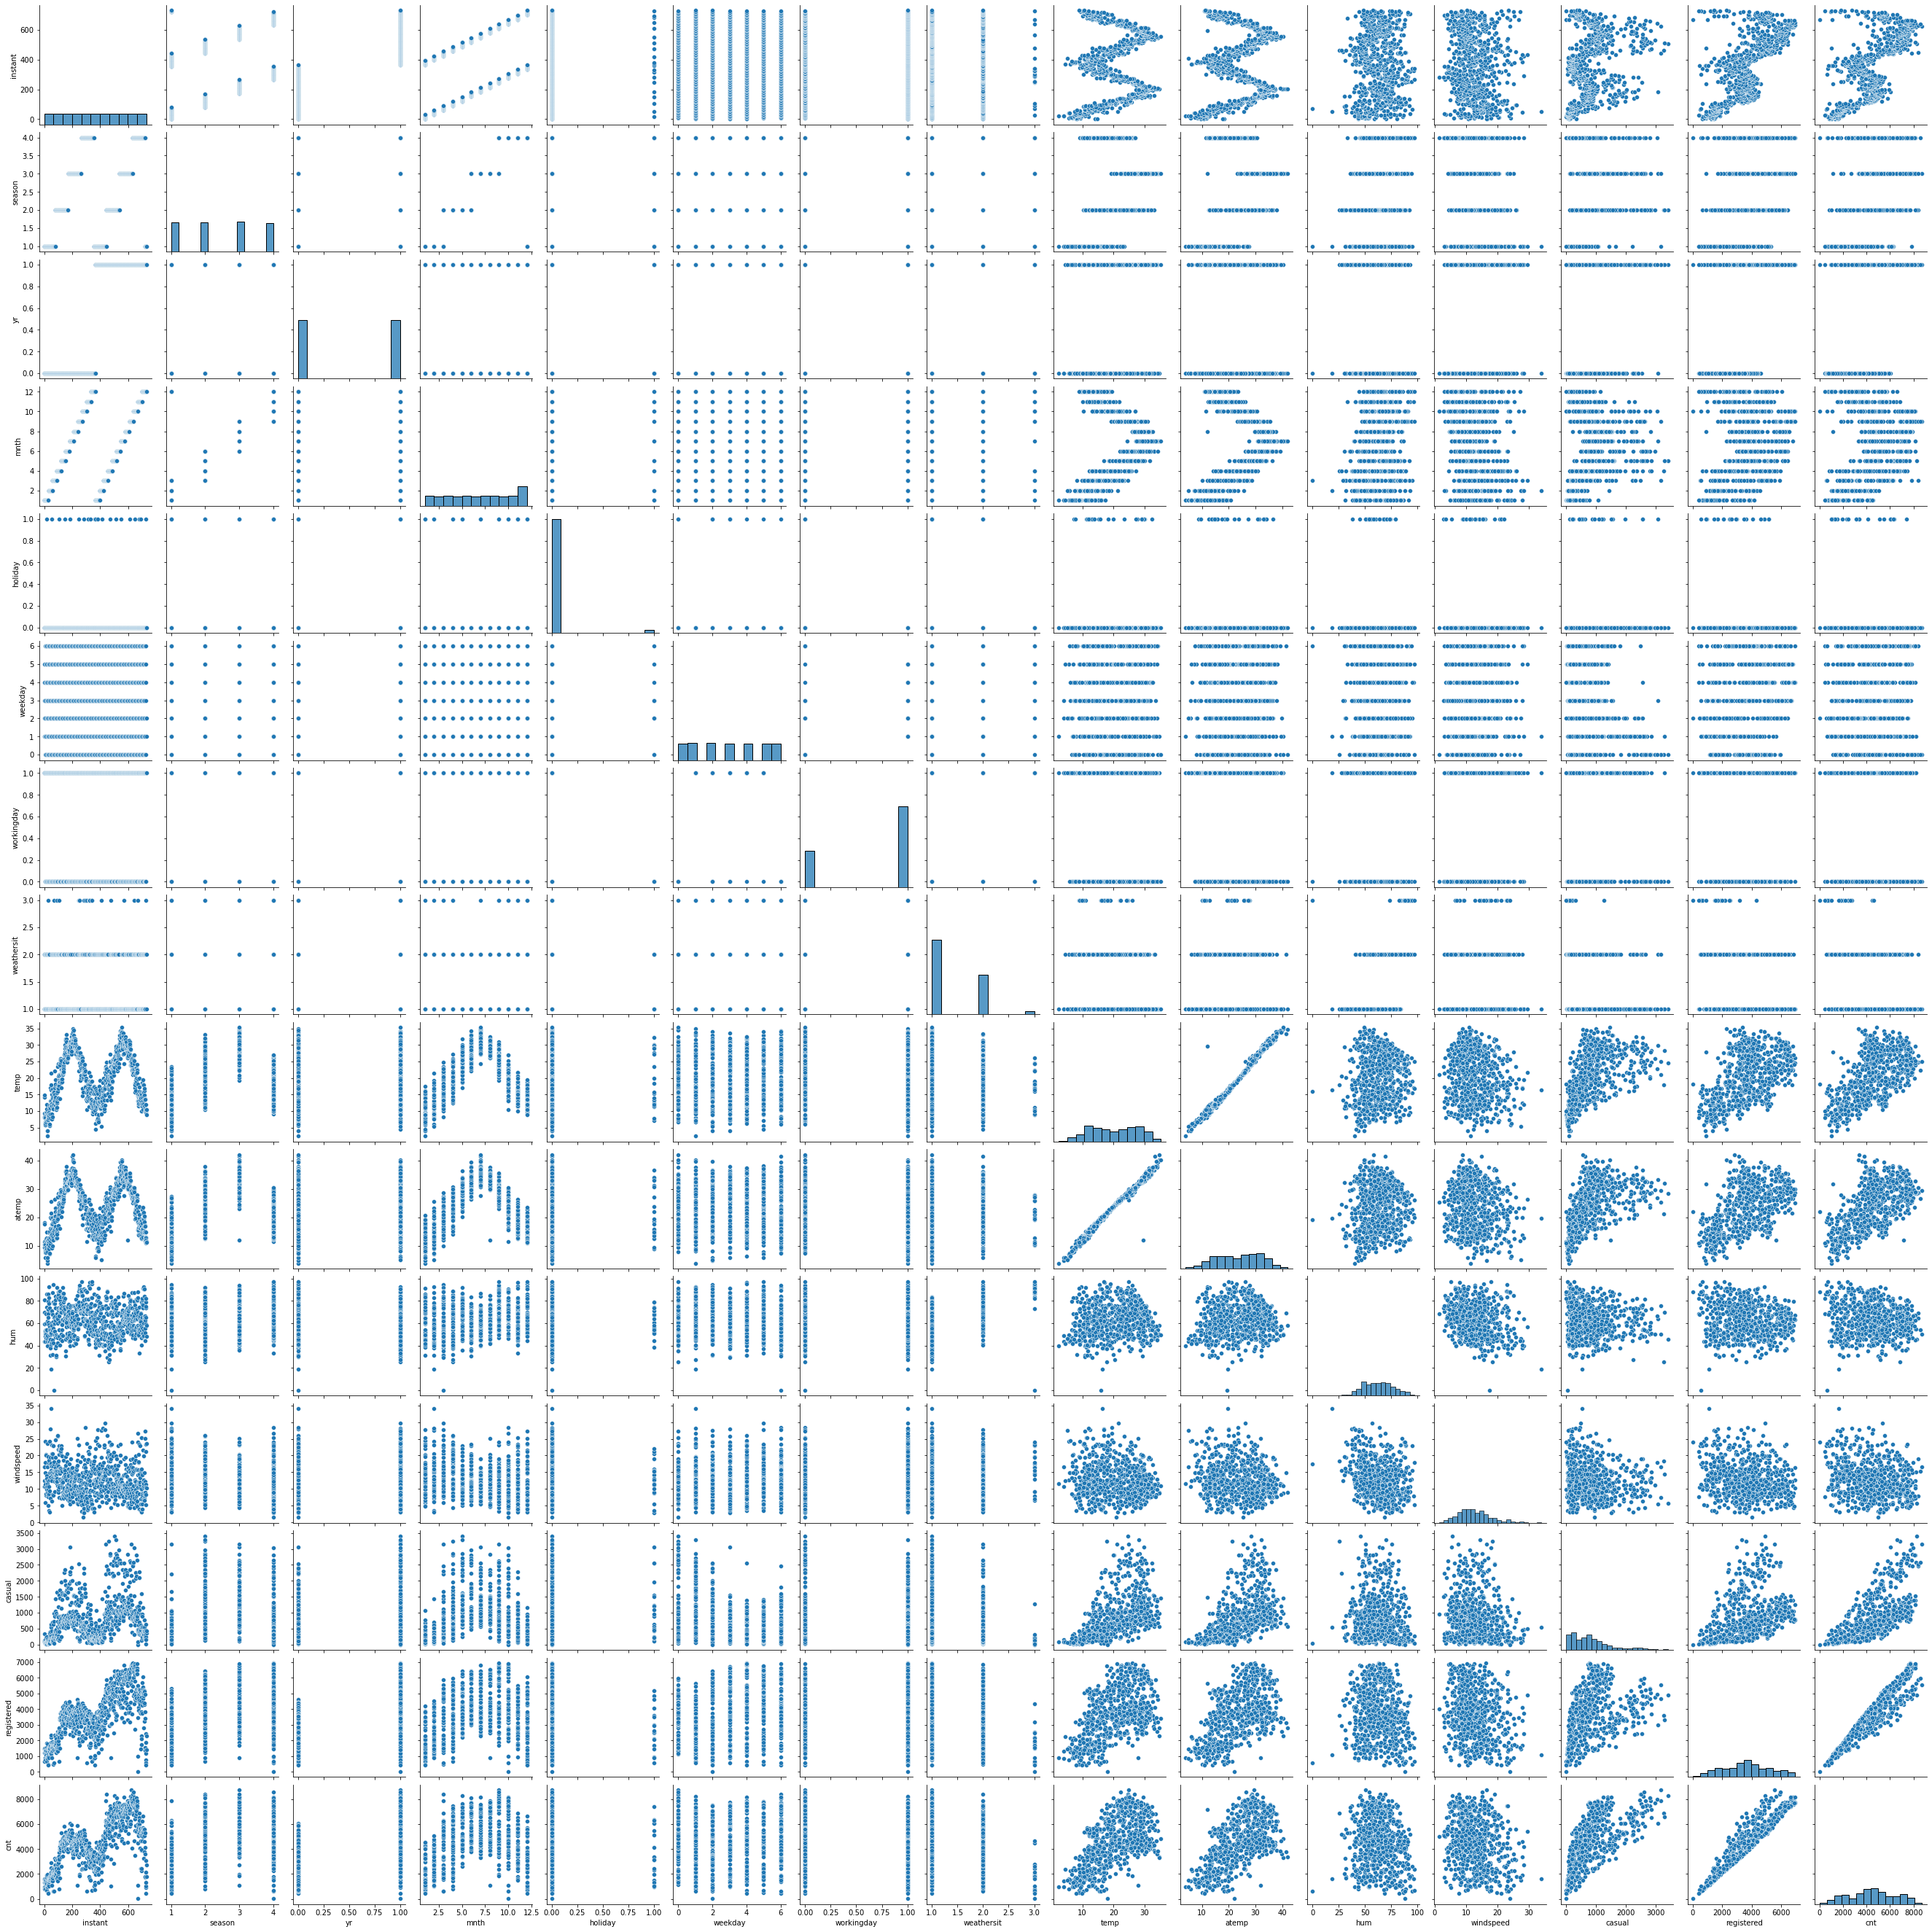

In [28]:
sns.pairplot(boombike)
plt.show()

## 3.2 Visualising Categorical Variables

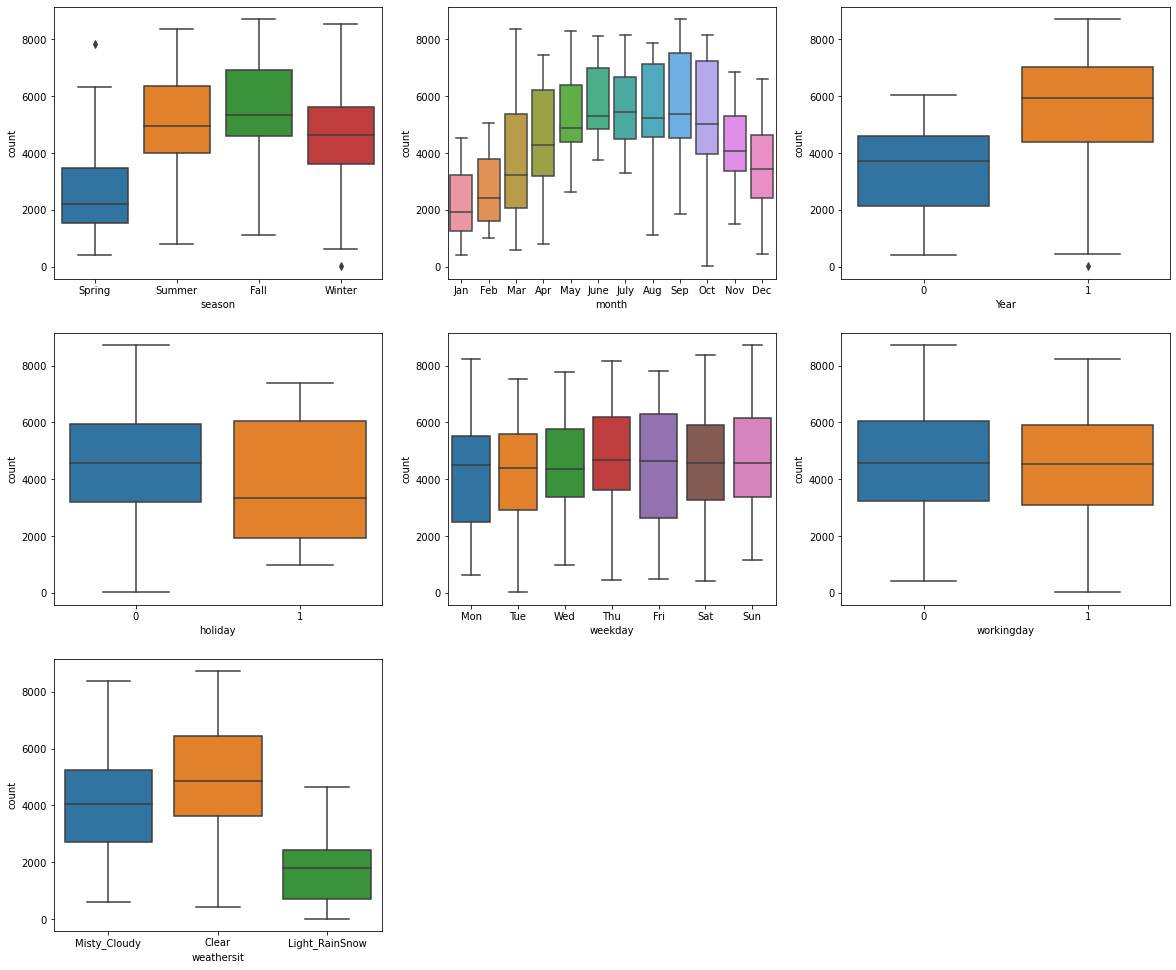

In [29]:
# Visualising categorical variables using box plot to see demands:
cat_vars = ['season','month','Year','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(20, 17))
for i in enumerate(cat_vars):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=boombikes, x=i[1], y='count')
plt.show()

### OBSERVATIONS:

The plots above shows the relationship between categorical variables and a Target variable.    
Insights that can be drawn from above plots:

- **Season** : Bike Rentals has *highest demand during the Fall season* followed by Summer and Winter Season. This shows, season can be a good predictor for the dependent variable.
- **Year** : *Bike Rentals are more in the year 2019* compared to 2018 i.e. Demand for next year has grown.
- **Month** : Demand is continuously growing each month till June. *September month has highest demand.* After September, demand is decreasing. This shows, month has trend for bookings and can be a good predictor for the dependent variable as During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme weather conditions.
- **Holiday** : Whenever there is a holiday, demand has decreased. Thus, holiday CANNOT be a good predictor for the dependent variable.
- **Weekday** is not giving clear picture about demand.
- **Workingday** : workingday can be a good predictor for the dependent variable
- **Weathersit** : The clear weathersit has highest demand followed by partly cloudly or misty weather. Thus, weathersit does shows some trend towards the bike bookings can be a good predictor for the dependent variable.


## 3.3 Visualising Numeric Variables

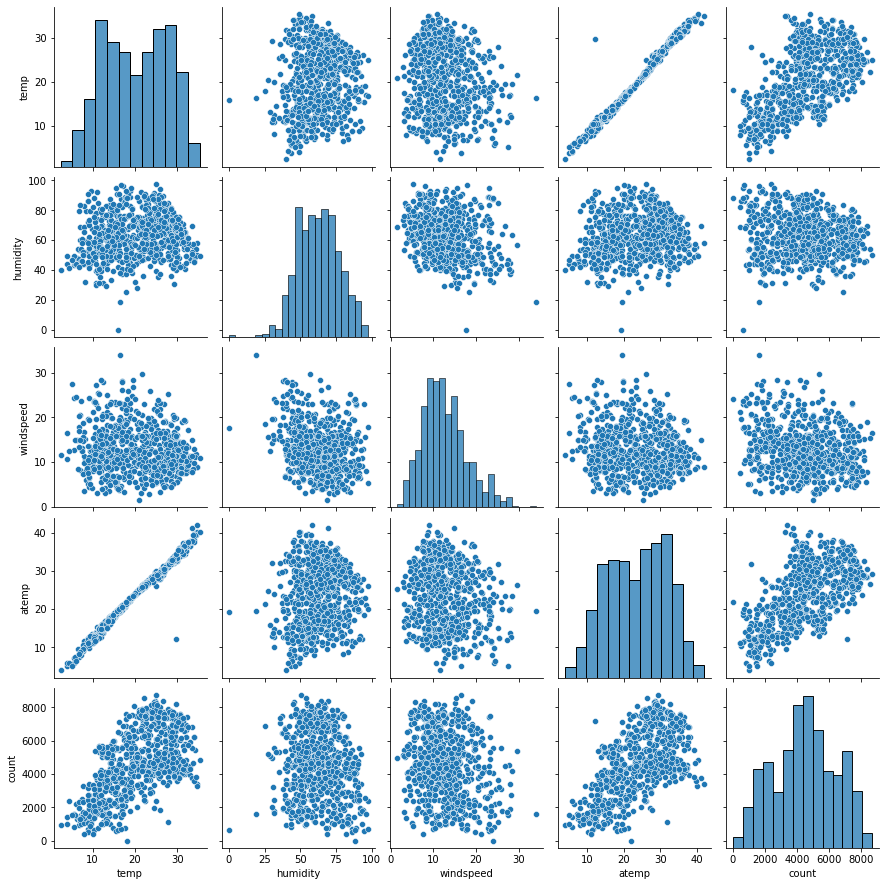

In [30]:
# Visualising numerical variables using scatter plot
# Pairplot for numeric variables
sns.pairplot(data=boombikes, vars=["temp", "humidity",'windspeed','atemp','count'])
plt.show()

### OBSERVATIONS:

- Bike rentals are more correlated to temperature.
- The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'count'

## 3.4 CORRELATION MATRIX

In [31]:
vars=["temp", "humidity",'windspeed','atemp','count']
## Numeric data

boombikes_numeric = boombikes[vars]
boombikes_numeric.head()

temp  humidity  windspeed     atemp  count
0  14.110847   80.5833  10.749882  18.18125    985
1  14.902598   69.6087  16.652113  17.68695    801
2   8.050924   43.7273  16.636703   9.47025   1349
3   8.200000   59.0435  10.739832  10.60610   1562
4   9.305237   43.6957  12.522300  11.46350   1600

- We can plot **Correlation Matrix** between numerical variables to know the exact values of correlation between them. 
- Also, a **Heatmap** is pretty useful to visualise multiple correlations in one plot.

In [32]:
# Correlation Matrix:
boombikes_corr = boombikes_numeric.corr()
boombikes_corr

temp  humidity  windspeed     atemp     count
temp       1.000000  0.128565  -0.158186  0.991696  0.627044
humidity   0.128565  1.000000  -0.248506  0.141512 -0.098543
windspeed -0.158186 -0.248506   1.000000 -0.183876 -0.235132
atemp      0.991696  0.141512  -0.183876  1.000000  0.630685
count      0.627044 -0.098543  -0.235132  0.630685  1.000000

## 3.5 HEATMAP

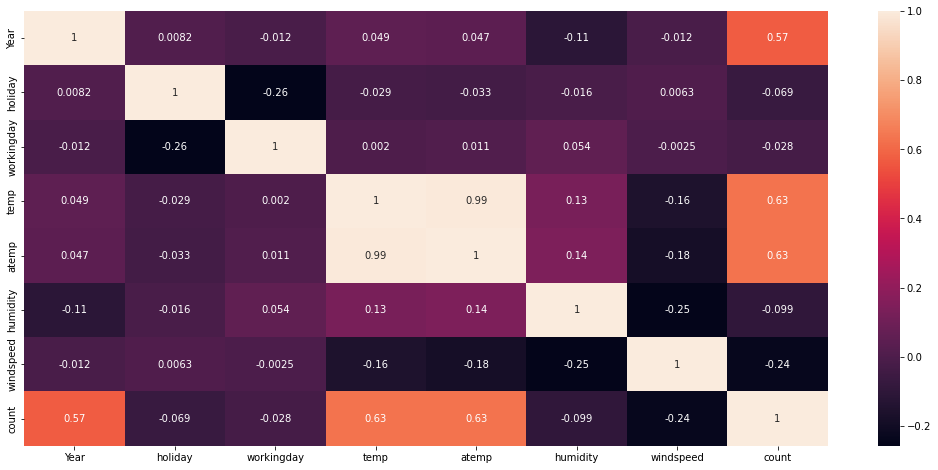

In [33]:
# Correlations on a heatmap for better visualisation
plt.figure(figsize = (18, 8))
sns.heatmap(boombikes.corr(), annot = True)
plt.show()

## Observations:

Correlation of Count with independent variables:
- Count is **negatively correlated** to 'windspeed' (-0.24 approximately). This gives us an impression that the shared bikes demand will be somewhat less on windy & and humidity days as compared to normal days.
- **MultiCollinearity** : Some of the independent variables are highly correlated (Matrix Top-left part): atemp and temp are highly (positively) correlated. The correlation between the two is almost equal to 1.

## 3.6 UNIVARIATE & BIVARIATE ANALYSIS:

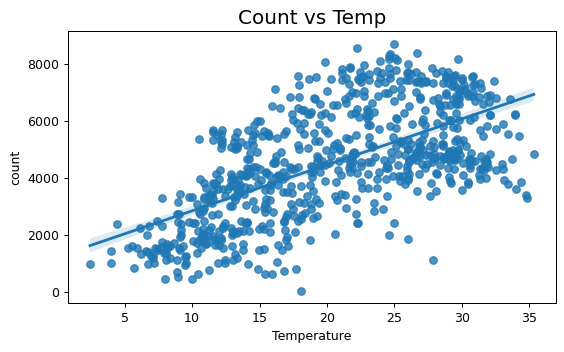

In [34]:
# Analyzing 'count' vs 'temp' plot
plt.figure(figsize=(7,4), dpi=90)
plt.title("Count vs Temp",fontsize=16)
sns.regplot(data=boombikes,y="count",x="temp")
plt.xlabel("Temperature")
plt.show()

##### OBSERVATION: 
- Demand for bikes is positively correlated to temperature.
- We can see that count is linearly increasing with temp indicating linear relation.

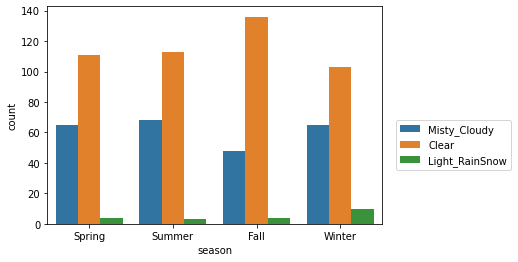

In [35]:
# Checking the variations of weather in each season
sns.countplot(data=boombikes , x='season',hue='weathersit')
plt.legend(bbox_to_anchor =(1.40,0.5))
plt.show()

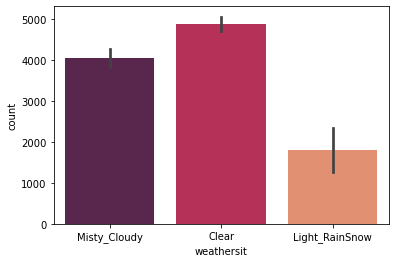

In [36]:
# Relation between weather and count of bike rentals
sns.barplot('weathersit','count',palette="rocket",data=boombikes)
plt.show()

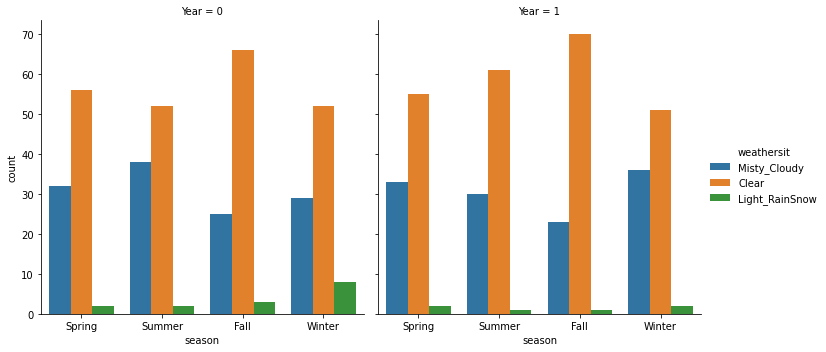

In [37]:
# Checking the variations of weather in each season for both years 2018 and 2019 
# where year (0: 2018, 1:2019)
sns.catplot(data=boombikes , x='season',hue='weathersit',col = 'Year',kind='count')
plt.show()

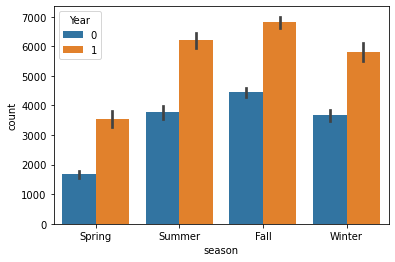

In [38]:
# Comparing the demand for shared Bikes in the year 2018(0) and 2019(1) for each season
sns.barplot(data =boombikes,x='season',y= 'count',hue='Year')
plt.show()

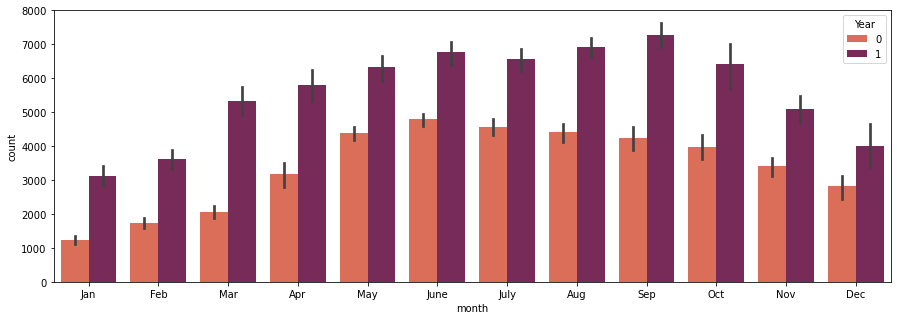

In [39]:
#Relation between month and 
plt.figure(figsize=(15,5))
sns.barplot('month','count',hue='Year',data=boombikes,palette='rocket_r')
plt.show()

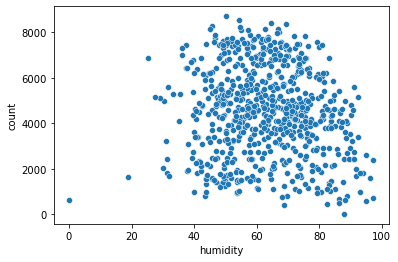

In [40]:
sns.scatterplot(x='humidity', y='count',data=boombikes)
plt.show()

In [41]:
boombikes.columns

Index(['season', 'Year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'count'], dtype='object')

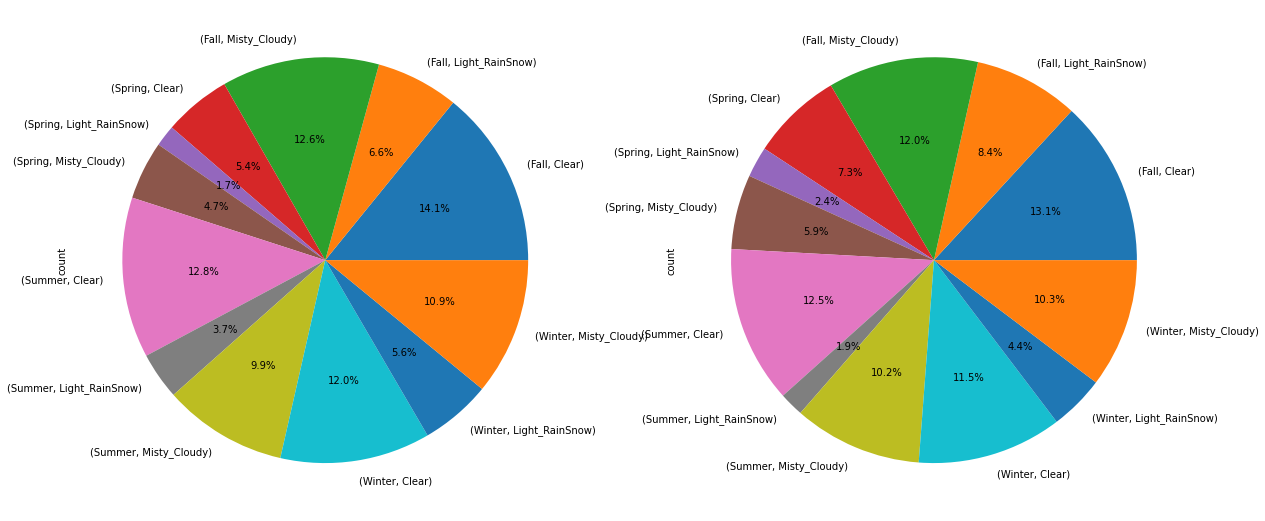

In [42]:
## Check the variations of weather in each season how it affects the demand for shared bikes
# yr : year (0: 2018, 1:2019)

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
data_2018 = boombikes[boombikes['Year'] == 0]
data_2018.groupby(['season','weathersit'])['count'].mean().plot.pie(autopct='%1.1f%%')

plt.subplot(1,2,2)
data_2019 = boombikes[boombikes['Year'] == 1]
data_2019.groupby(['season','weathersit'])['count'].mean().plot.pie(autopct='%1.1f%%')

plt.show()

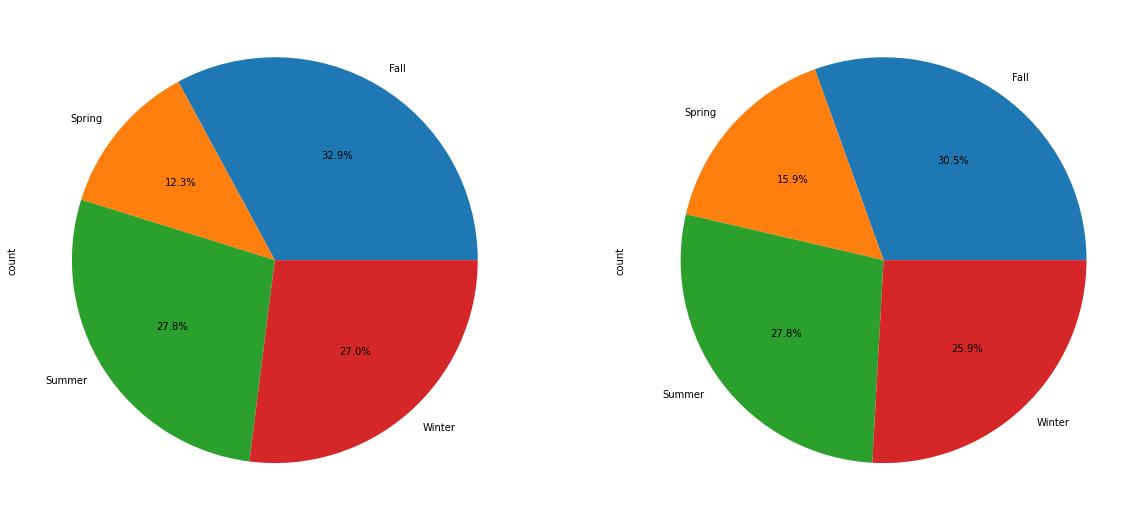

In [43]:
## Check  how season affects the demand for shared bikes
# yr : year (0: 2018, 1:2019)

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
data_2018 = boombikes[boombikes['Year'] == 0]
data_2018.groupby(['season'])['count'].mean().plot.pie(autopct='%1.1f%%')

plt.subplot(1,2,2)
data_2019 = boombikes[boombikes['Year'] == 1]
data_2019.groupby(['season'])['count'].mean().plot.pie(autopct='%1.1f%%')

plt.show()

### Observation:

- Bike Rentals are observed at higher temperatures.
- Bike rentals more at high humidity
- Bike Rentals are more during the Clear or Partly Cloudy Weather.
- The demand for shared bikes is increased from 2018 to 2019
- Demand for shared bikes is more in falls season compare to all other season
- In Spring season the demand is least and in fall season the demand for shared bikes is highest.

### Insight :
1. If the lockdown is over and conditions becomes normal gradually the demand for shared bikes will increase.We have do proper advertising,promotions and give proper offers.
2. The demand for shared bikes depends upon the season and weathersit. Therefore, season and weathersit are important driving factors.

# <center> STEP 4: DATA PREPARATION FOR MODELLING

1. Converting Categorical variables to Dummy variables
2. Spliting into Train and Test data
3. Rescaling of data

## Creation Of Dummy Variables

#### Dummy Variables Creation: 
The Categorical variables `season`,`month`,`weekday` and `weathersit` have different levels. We need to convert these levels into integers. Thus `dummy variables` are created

In [44]:
# Subset all categorical variables
dummy_cat = boombikes.select_dtypes(include=['object'])
dummy_cat.head()

season month weekday    weathersit
0  Spring   Jan     Mon  Misty_Cloudy
1  Spring   Jan     Tue  Misty_Cloudy
2  Spring   Jan     Wed         Clear
3  Spring   Jan     Thu         Clear
4  Spring   Jan     Fri         Clear

In [45]:
# Get the dummy variables for the categorical colns & store in dummies_df dataframe
# Creating dummy variables for season , mnth ,weathersit ,weekday
dummy_bike = pd.get_dummies(dummy_cat, drop_first=True)
dummy_bike.head()

season_Spring  season_Summer  season_Winter  month_Aug  month_Dec  month_Feb  month_Jan  month_July  month_June  month_Mar  month_May  month_Nov  month_Oct  month_Sep  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  weekday_Wed  weathersit_Light_RainSnow  weathersit_Misty_Cloudy
0              1              0              0          0          0          0          1           0           0          0          0          0          0          0            1            0            0            0            0            0                          0                        1
1              1              0              0          0          0          0          1           0           0          0          0          0          0          0            0            0            0            0            1            0                          0                        1
2              1              0              0          0          0          0          1           0           0          0          0          0          0          0            0            0            0            0            0            1                          0                        0
3              1              0              0          0          0          0          1           0           0          0          0          0          0          0            0            0            0            1            0            0                          0                        0
4              1              0              0          0          0          0          1           0           0          0          0          0          0          0            0            0            0            0            0            0                          0                        0

In [46]:
# Concatenating dummy variables to original boombikes dataset
boombikes = pd.concat([boombikes,dummy_bike],axis = 1)

In [47]:
# Dropping categorical variable columns ['season', 'mnth', 'weekday','weathersit'] for which dummy variables were created
boombikes = boombikes.drop(list(dummy_cat.columns), axis=1)

In [48]:
#removing atemp as it is highly correlated with temp
boombikes.drop('atemp',axis=1,inplace=True)    

In [49]:
# Checking Shape of updated Dataset after dummy variables creation
boombikes.shape

(730, 29)

In [50]:
# Checking the head of dataset after dropping the dummy variables
boombikes.head()

Year  holiday  workingday       temp  humidity  windspeed  count  season_Spring  season_Summer  season_Winter  month_Aug  month_Dec  month_Feb  month_Jan  month_July  month_June  month_Mar  month_May  month_Nov  month_Oct  month_Sep  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  weekday_Wed  weathersit_Light_RainSnow  weathersit_Misty_Cloudy
0     0        0           1  14.110847   80.5833  10.749882    985              1              0              0          0          0          0          1           0           0          0          0          0          0          0            1            0            0            0            0            0                          0                        1
1     0        0           1  14.902598   69.6087  16.652113    801              1              0              0          0          0          0          1           0           0          0          0          0          0          0            0            0            0            0            1            0                          0                        1
2     0        0           1   8.050924   43.7273  16.636703   1349              1              0              0          0          0          0          1           0           0          0          0          0          0          0            0            0            0            0            0            1                          0                        0
3     0        0           1   8.200000   59.0435  10.739832   1562              1              0              0          0          0          0          1           0           0          0          0          0          0          0            0            0            0            1            0            0                          0                        0
4     0        0           1   9.305237   43.6957  12.522300   1600              1              0              0          0          0          0          1           0           0          0          0          0          0          0            0            0            0            0            0            0                          0                        0

### Heatmap to Check Correlation between Newly Created variables 

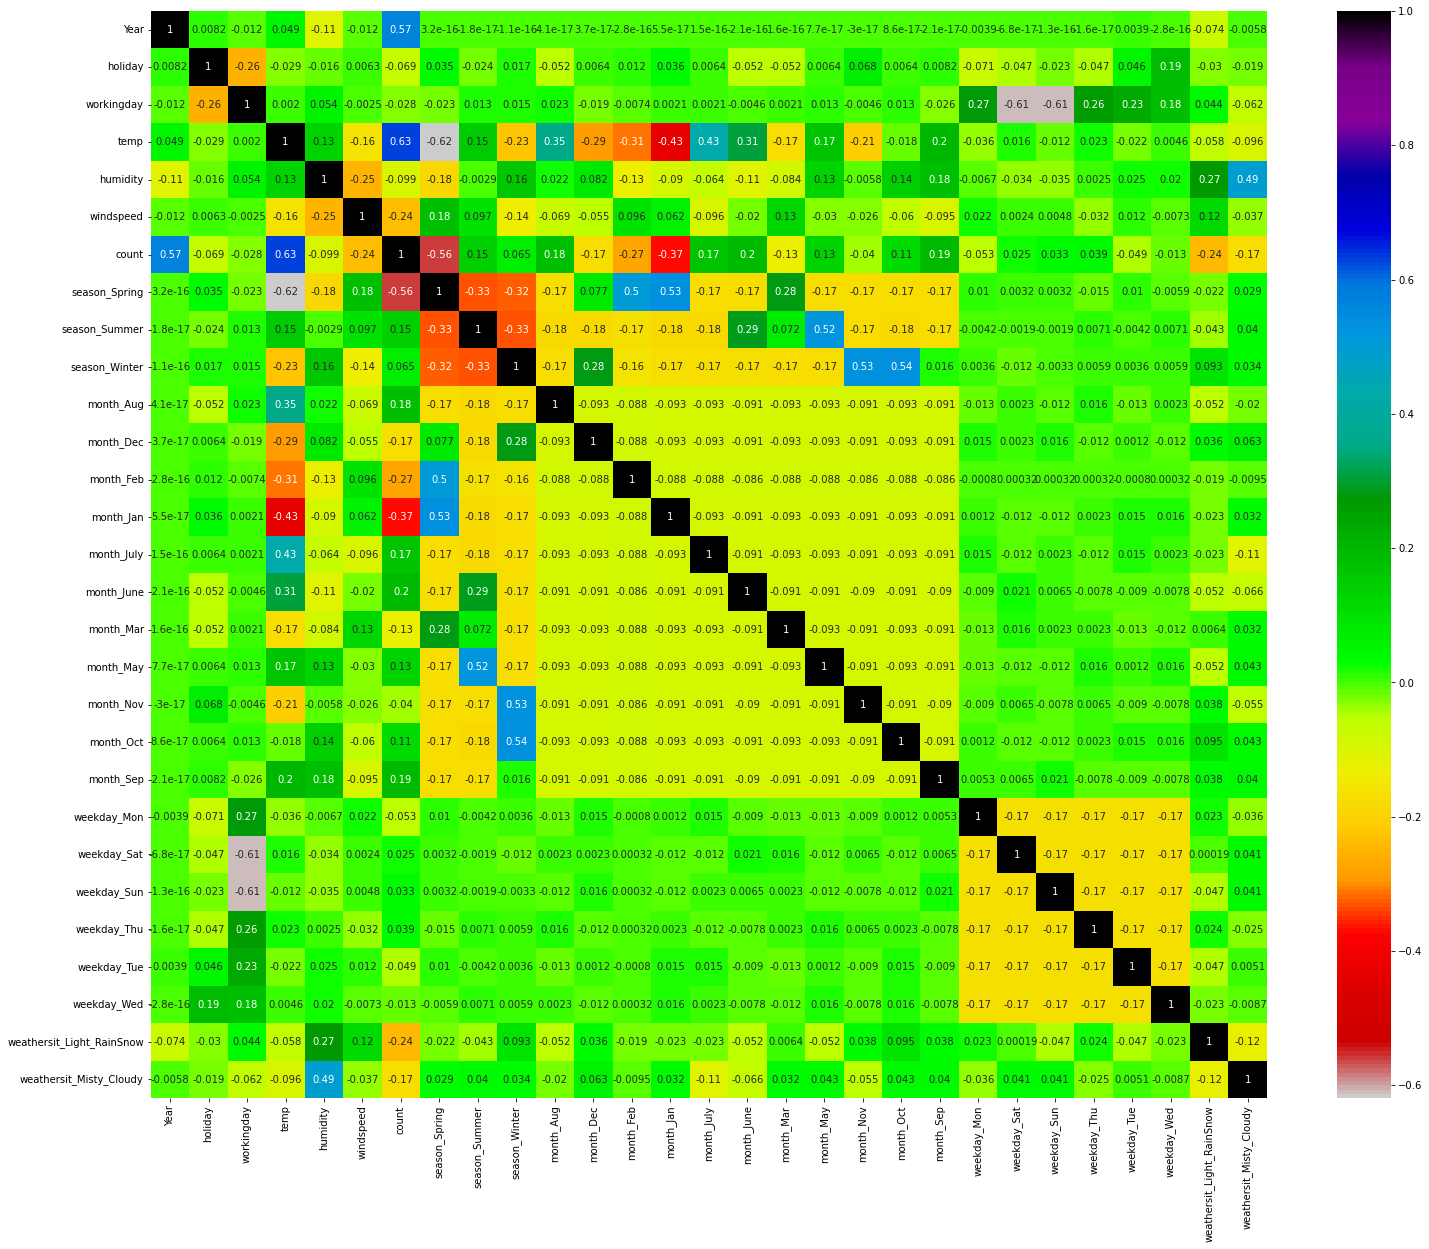

In [51]:
plt.figure(figsize=(25, 20))
sns.heatmap(boombikes.corr(), cmap= 'nipy_spectral_r' , annot = True)
plt.show()

### Observation:
Temperature,Summer season,June to october months are in good correlation with the 'count' variable & seems to have good influence on the number of bike rentals.

# <center> STEP 5: SPLITTING THE DATA INTO TRAINING AND TESTING SETS 

Before model building, we first need to perform the **Train-Test Split and Scale the features.**

In [52]:
# Split the dataframe into Train and Test datasets
from sklearn.model_selection import train_test_split
bikesdf_train, bikesdf_test = train_test_split(boombikes, train_size=0.7, test_size=0.3, random_state=100)

In [53]:
# No. of Rows and columns after Train-Test Splits

print(bikesdf_train.shape)
print(bikesdf_test.shape)

(510, 29)
(219, 29)


In [54]:
bikesdf_train.head()

Year  holiday  workingday       temp  humidity  windspeed  count  season_Spring  season_Summer  season_Winter  month_Aug  month_Dec  month_Feb  month_Jan  month_July  month_June  month_Mar  month_May  month_Nov  month_Oct  month_Sep  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  weekday_Wed  weathersit_Light_RainSnow  weathersit_Misty_Cloudy
653     1        0           1  19.201653   55.8333  12.208807   7534              0              0              1          0          0          0          0           0           0          0          0          0          1          0            0            0            0            0            0            1                          0                        0
576     1        0           1  29.246653   70.4167  11.083475   7216              0              0              0          0          0          0          0           1           0          0          0          0          0          0            0            0            0            0            0            1                          0                        0
426     1        0           0  16.980847   62.1250  10.792293   4066              1              0              0          0          0          0          0           0           0          1          0          0          0          0            0            0            1            0            0            0                          0                        1
728     1        0           1  10.489153   48.3333  23.500518   1796              1              0              0          0          1          0          0           0           0          0          0          0          0          0            1            0            0            0            0            0                          0                        0
482     1        0           0  15.443347   48.9583   8.708325   4220              0              1              0          0          0          0          0           0           0          0          0          0          0          0            0            0            1            0            0            0                          0                        1

# <center> STEP 6: IMPUTATION & RESCALING THE FEATURES

## 6.1 MISSING VALUE IMPUTATION

In [55]:
#Check for NULL/MISSING values:
# percentage of missing values in each column
round(100*(boombikes.isnull().sum()/len(boombikes)), 2).sort_values(ascending=False)

Year                         0.0
month_June                   0.0
weathersit_Light_RainSnow    0.0
weekday_Wed                  0.0
weekday_Tue                  0.0
weekday_Thu                  0.0
weekday_Sun                  0.0
weekday_Sat                  0.0
weekday_Mon                  0.0
month_Sep                    0.0
month_Oct                    0.0
month_Nov                    0.0
month_May                    0.0
month_Mar                    0.0
month_July                   0.0
holiday                      0.0
month_Jan                    0.0
month_Feb                    0.0
month_Dec                    0.0
month_Aug                    0.0
season_Winter                0.0
season_Summer                0.0
season_Spring                0.0
count                        0.0
windspeed                    0.0
humidity                     0.0
temp                         0.0
workingday                   0.0
weathersit_Misty_Cloudy      0.0
dtype: float64

**No Missing Values in Dataset so No Missing Value Imputation Required**

## 6.2 RESCALING THE FEATURES

1. It is important to have all the variables on the `Same Scale` for the model to be easily `Interpretable`. 
2. We can use standardization or normalization so that the units of the coefficients obtained are all on the same scale.
3. But we only need the scale the numeric columns and not the dummy variables. 
4. Also, the scaling has to be done only on the `train dataset` as we don't want it to learn anything from the test data.

**There are two common ways of Rescaling:**
- **Min-Max scaling (Normalisation)**
- **Standardisation**

### Using MinMaxScaler Method

In [56]:
#import the library
from sklearn.preprocessing import MinMaxScaler 

#Instantiate an object
scaler = MinMaxScaler()

In [57]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

#Create a list of numeric variables
num_var = ['temp', 'humidity', 'windspeed','count']

#Fit on data
bikesdf_train[num_var] = scaler.fit_transform(bikesdf_train[num_var])

In [58]:
# Checking Dataset
bikesdf_train.head()

Year  holiday  workingday      temp  humidity  windspeed     count  season_Spring  season_Summer  season_Winter  month_Aug  month_Dec  month_Feb  month_Jan  month_July  month_June  month_Mar  month_May  month_Nov  month_Oct  month_Sep  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  weekday_Wed  weathersit_Light_RainSnow  weathersit_Misty_Cloudy
653     1        0           1  0.509887  0.575354   0.300794  0.864243              0              0              1          0          0          0          0           0           0          0          0          0          1          0            0            0            0            0            0            1                          0                        0
576     1        0           1  0.815169  0.725633   0.264686  0.827658              0              0              0          0          0          0          0           1           0          0          0          0          0          0            0            0            0            0            0            1                          0                        0
426     1        0           0  0.442393  0.640189   0.255342  0.465255              1              0              0          0          0          0          0           0           0          1          0          0          0          0            0            0            1            0            0            0                          0                        1
728     1        0           1  0.245101  0.498067   0.663106  0.204096              1              0              0          0          1          0          0           0           0          0          0          0          0          0            1            0            0            0            0            0                          0                        0
482     1        0           0  0.395666  0.504508   0.188475  0.482973              0              1              0          0          0          0          0           0           0          0          0          0          0          0            0            0            1            0            0            0                          0                        1

In [59]:
#Checking Statistics of numeric variables(min and max) after scaling
bikesdf_train.describe()

Year     holiday  workingday        temp    humidity   windspeed       count  season_Spring  season_Summer  season_Winter   month_Aug   month_Dec   month_Feb   month_Jan  month_July  month_June   month_Mar   month_May   month_Nov   month_Oct   month_Sep  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  weekday_Wed  weathersit_Light_RainSnow  weathersit_Misty_Cloudy
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000     510.000000     510.000000      510.00000  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   510.000000   510.000000   510.000000   510.000000   510.000000   510.000000                 510.000000               510.000000
mean     0.507843    0.025490    0.711765    0.537262    0.650369    0.320768    0.513620       0.243137       0.245098        0.24902    0.096078    0.084314    0.066667    0.088235    0.076471    0.074510    0.098039    0.084314    0.086275    0.086275    0.080392     0.154902     0.129412     0.137255     0.143137     0.152941     0.135294                   0.029412                 0.343137
std      0.500429    0.157763    0.453386    0.225844    0.145882    0.169797    0.224593       0.429398       0.430568        0.43287    0.294988    0.278131    0.249689    0.283915    0.266010    0.262857    0.297660    0.278131    0.281045    0.281045    0.272166     0.362166     0.335985     0.344454     0.350557     0.360284     0.342373                   0.169124                 0.475223
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000       0.000000       0.000000        0.00000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000                   0.000000                 0.000000
25%      0.000000    0.000000    0.000000    0.339853    0.538643    0.199179    0.356420       0.000000       0.000000        0.00000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000                   0.000000                 0.000000
50%      1.000000    0.000000    1.000000    0.540519    0.653714    0.296763    0.518638       0.000000       0.000000        0.00000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000                   0.000000                 0.000000
75%      1.000000    0.000000    1.000000    0.735215    0.754830    0.414447    0.684710       0.000000       0.000000        0.00000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000                   0.000000                 1.000000
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000       1.000000       1.000000        1.00000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000     1.000000     1.000000     1.000000     1.000000     1.000000     1.000000                   1.000000                 1.000000

##### All the numeric variables are now mapped between 0 and 1

### Multicollinearity Check

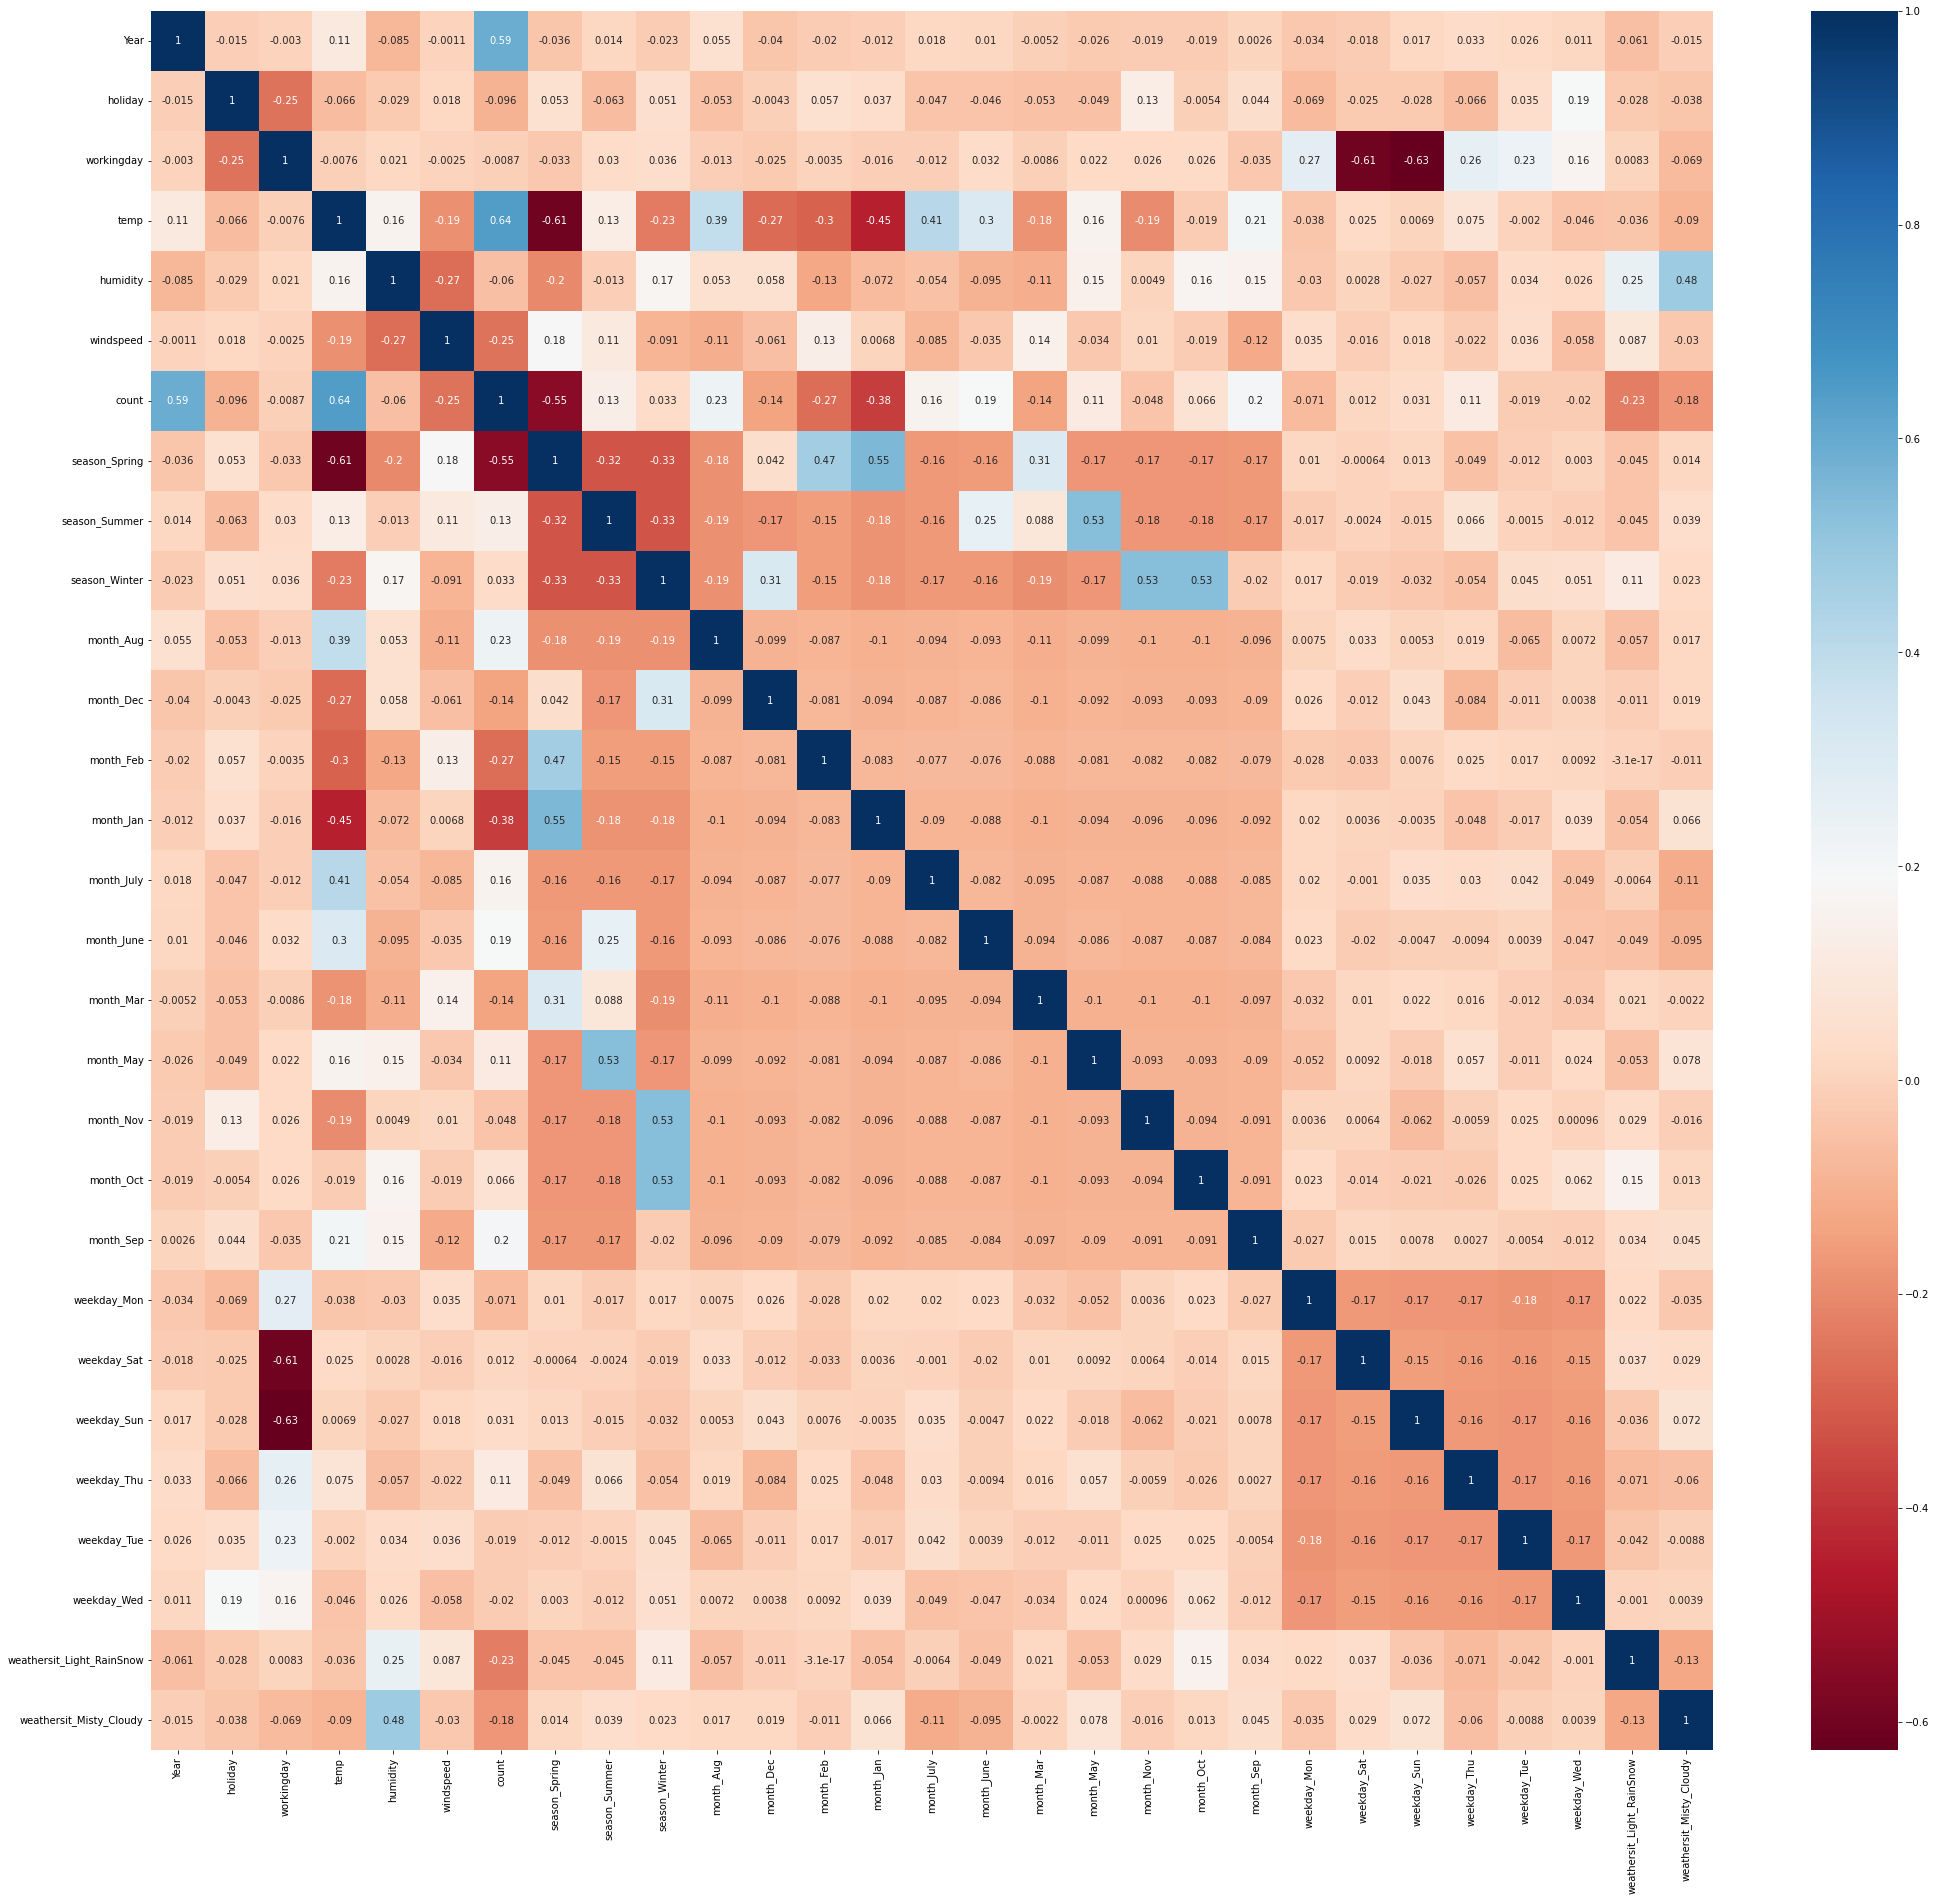

In [60]:
# Multicollinearity: Checking the correlation coefficients to find out which variables are highly correlated
plt.figure(figsize = (35, 32))
sns.heatmap(bikesdf_train.corr(), annot = True, cmap="RdBu")
plt.show()

- The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
- From the heatmap we can see temp, year are correlated to the 'count' variable. 
- Even in August, September months we can see the counts are little high.
- We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

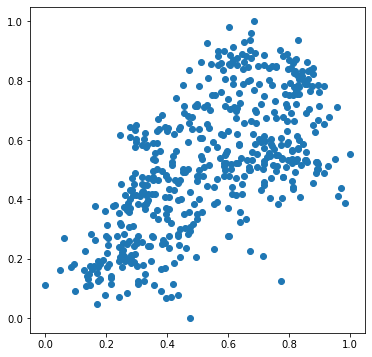

In [61]:
# using pairplot to see the correlation between temp vs count
plt.figure(figsize=[6,6])
plt.scatter(bikesdf_train['temp'], bikesdf_train['count'])
plt.show()

# <center> STEP 7: BUILDING A LINEAR MODEL 

## 7.1 Dividing into X and Y sets for the model building

In [62]:
# Dividing the data into X & y variable
y_train = bikesdf_train.pop('count')
X_train = bikesdf_train

# y_train will contain only the target variable ('count') as it is dependent on all other variables
# x_train will contain all independent variables, except 'count'

In [63]:
X_train.head()

Year  holiday  workingday      temp  humidity  windspeed  season_Spring  season_Summer  season_Winter  month_Aug  month_Dec  month_Feb  month_Jan  month_July  month_June  month_Mar  month_May  month_Nov  month_Oct  month_Sep  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  weekday_Wed  weathersit_Light_RainSnow  weathersit_Misty_Cloudy
653     1        0           1  0.509887  0.575354   0.300794              0              0              1          0          0          0          0           0           0          0          0          0          1          0            0            0            0            0            0            1                          0                        0
576     1        0           1  0.815169  0.725633   0.264686              0              0              0          0          0          0          0           1           0          0          0          0          0          0            0            0            0            0            0            1                          0                        0
426     1        0           0  0.442393  0.640189   0.255342              1              0              0          0          0          0          0           0           0          1          0          0          0          0            0            0            1            0            0            0                          0                        1
728     1        0           1  0.245101  0.498067   0.663106              1              0              0          0          1          0          0           0           0          0          0          0          0          0            1            0            0            0            0            0                          0                        0
482     1        0           0  0.395666  0.504508   0.188475              0              1              0          0          0          0          0           0           0          0          0          0          0          0            0            0            1            0            0            0                          0                        1

In [64]:
X_train.shape

(510, 28)

## 7.2 First Model Bulding based on all features

#### A) Model Bulding using "Statsmodel"

In [65]:
import statsmodels.api as sm
# Adding constant
X_train_sm = sm.add_constant(X_train)

# Running the model
lr = sm.OLS(y_train, X_train_sm).fit()

# Checking the parameters
lr.params

const                        0.394543
Year                         0.230857
holiday                     -0.135424
workingday                  -0.060524
temp                         0.445458
humidity                    -0.157315
windspeed                   -0.183046
season_Spring               -0.043705
season_Summer                0.042243
season_Winter                0.110897
month_Aug                    0.021507
month_Dec                   -0.045669
month_Feb                   -0.037279
month_Jan                   -0.063612
month_July                  -0.034910
month_June                   0.000975
month_Mar                    0.000608
month_May                    0.024064
month_Nov                   -0.041555
month_Oct                    0.005790
month_Sep                    0.086055
weekday_Mon                 -0.024633
weekday_Sat                 -0.056319
weekday_Sun                 -0.049961
weekday_Thu                  0.003863
weekday_Tue                 -0.026299
weekday_Wed 

#### B) Model Bulding using "SciKit Learn"

In [66]:
#Checking Same using ScikitLearn Library
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 0.23085682 -0.13542389 -0.06052424  0.44545797 -0.15731473 -0.18304612
 -0.04370474  0.04224289  0.11089693  0.02150709 -0.04566922 -0.03727876
 -0.06361179 -0.03490968  0.00097451  0.00060798  0.02406416 -0.04155465
  0.00578994  0.08605503 -0.02463298 -0.05631912 -0.04996141  0.00386328
 -0.02629921 -0.01124081 -0.25151085 -0.05935514]
0.3945428483421004


#### C) Model Summary:

In [67]:
# Checking the model summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          4.33e-179
Time:                        12:51:49   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.3945      0.085      4.640      0.000       0.227       0.562
Year                          0.2309      0.008     28.387      0.000       0.215       0.247
holiday                      -0.1354      0.065     -2.072      0.039      -0.264      -0.007
workingday                   -0.0605      0.071     -0.852      0.395      -0.200       0.079
temp                          0.4455      0.047      9.513      0.000       0.353       0.537
humidity                     -0.1573      0.039     -4.049      0.000      -0.234      -0.081
windspeed                    -0.1830      0.026     -7.036      0.000      -0.234      -0.132
season_Spring                -0.0437      0.030     -1.444      0.149      -0.103       0.016
season_Summer                 0.0422      0.026      1.598      0.111      -0.010       0.094
season_Winter                 0.1109      0.028      3.938      0.000       0.056       0.166
month_Aug                     0.0215      0.034      0.632      0.527      -0.045       0.088
month_Dec                    -0.0457      0.034     -1.348      0.178      -0.112       0.021
month_Feb                    -0.0373      0.033     -1.121      0.263      -0.103       0.028
month_Jan                    -0.0636      0.034     -1.880      0.061      -0.130       0.003
month_July                   -0.0349      0.035     -0.985      0.325      -0.105       0.035
month_June                    0.0010      0.025      0.038      0.969      -0.049       0.051
month_Mar                     0.0006      0.025      0.025      0.980      -0.048       0.049
month_May                     0.0241      0.021      1.134      0.257      -0.018       0.066
month_Nov                    -0.0416      0.037     -1.133      0.258      -0.114       0.031
month_Oct                     0.0058      0.036      0.160      0.873      -0.065       0.077
month_Sep                     0.0861      0.032      2.667      0.008       0.023       0.149
weekday_Mon                  -0.0246      0.015     -1.690      0.092      -0.053       0.004
weekday_Sat                  -0.0563      0.072     -0.787      0.432      -0.197       0.084
weekday_Sun                  -0.0500      0.071     -0.699      0.485      -0.190       0.091
weekday_Thu                   0.0039      0.015      0.258      0.796      -0.026       0.033
weekday_Tue                  -0.0263      0.015     -1.792      0.074      -0.055       0.003
weekday_Wed                  -0.0112      0.015     -0.736      0.462      -0.041       0.019
weathersit_Light_RainSnow    -0.2515      0.027     -9.455      0.000      -0.304      -0.199
weathersit_Misty_Cloudy      -0.0594      0.011     -5.637      0.000      -0.080      -0.039
===========================================================================

#### D) Result

- This model has an **R-squared:85.1%** & **Adjusted R-squared value of 84.2%** which seems pretty good. 
- But **number of features : 28 (More in no.)** . So will exclude those which are Multicollinear & not much relevant in explaining the target variable.

## 7.3 Model Building Using RFE + Manual Approach

### A) Model Building Using RFE- Recursive Feature Elimination

**STEPS:**
- Since we have 28 features and manually one by one feature elimination is very hectic so RFE is used to eliminate the features.
- We will First build a model using recursive feature elimination to select features (start off with an arbitrary number of 15 features)
- Then secondly, on that features statsmodel library will be used to find out the R2 and Adjusted R2.

In [68]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# RFE with 15 features
lm = LinearRegression()
lm.fit(X_train, y_train)

# Fit with 15 features
rfe = RFE(lm, 15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [69]:
# Printing the boolean results with List of variables selected & their respective ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('month_Aug', False, 9),
 ('month_Dec', True, 1),
 ('month_Feb', False, 2),
 ('month_Jan', True, 1),
 ('month_July', True, 1),
 ('month_June', False, 13),
 ('month_Mar', False, 14),
 ('month_May', False, 6),
 ('month_Nov', True, 1),
 ('month_Oct', False, 11),
 ('month_Sep', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', False, 4),
 ('weekday_Sun', False, 5),
 ('weekday_Thu', False, 12),
 ('weekday_Tue', False, 7),
 ('weekday_Wed', False, 10),
 ('weathersit_Light_RainSnow', True, 1),
 ('weathersit_Misty_Cloudy', True, 1)]

In [70]:
#Columns where RFE support is False i.e. Features Not selected are:
X_train.columns[~rfe.support_]

Index(['workingday', 'month_Aug', 'month_Feb', 'month_June', 'month_Mar', 'month_May', 'month_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed'], dtype='object')

#### Selected 15 Features for Linear Modelling using RFE are:

In [71]:
#Columns where RFE support is True
selected_col = X_train.columns[rfe.support_]
selected_col

Index(['Year', 'holiday', 'temp', 'humidity', 'windspeed', 'season_Spring', 'season_Summer', 'season_Winter', 'month_Dec', 'month_Jan', 'month_July', 'month_Nov', 'month_Sep', 'weathersit_Light_RainSnow', 'weathersit_Misty_Cloudy'], dtype='object')

### B) Building model using statsmodel, for the detailed statistics

### B1) MODEL 1

In [72]:
# Creating X_train dataframe with RFE selected variables i.e. Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[selected_col]

In [73]:
# Adding a constant variable to the model
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

const  Year  holiday      temp  humidity  windspeed  season_Spring  season_Summer  season_Winter  month_Dec  month_Jan  month_July  month_Nov  month_Sep  weathersit_Light_RainSnow  weathersit_Misty_Cloudy
653    1.0     1        0  0.509887  0.575354   0.300794              0              0              1          0          0           0          0          0                          0                        0
576    1.0     1        0  0.815169  0.725633   0.264686              0              0              0          0          0           1          0          0                          0                        0
426    1.0     1        0  0.442393  0.640189   0.255342              1              0              0          0          0           0          0          0                          0                        1
728    1.0     1        0  0.245101  0.498067   0.663106              1              0              0          1          0           0          0          0                          0                        0
482    1.0     1        0  0.395666  0.504508   0.188475              0              1              0          0          0           0          0          0                          0                        1

In [74]:
# Running the linear model & Fitting the model with 15 variables
lm1 = sm.OLS(y_train,X_train_rfe1).fit()   

In [75]:
#Let's see the summary of our linear model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          3.34e-189
Time:                        12:51:49   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.3202      0.036      8.886      0.000       0.249       0.391
Year                          0.2303      0.008     28.511      0.000       0.214       0.246
holiday                      -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp                          0.4800      0.037     12.977      0.000       0.407       0.553
humidity                     -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed                    -0.1885      0.026     -7.312      0.000      -0.239      -0.138
season_Spring                -0.0617      0.021     -2.907      0.004      -0.103      -0.020
season_Summer                 0.0408      0.015      2.659      0.008       0.011       0.071
season_Winter                 0.1034      0.018      5.763      0.000       0.068       0.139
month_Dec                    -0.0372      0.017     -2.131      0.034      -0.071      -0.003
month_Jan                    -0.0437      0.018     -2.415      0.016      -0.079      -0.008
month_July                   -0.0555      0.018     -3.046      0.002      -0.091      -0.020
month_Nov                    -0.0409      0.019     -2.187      0.029      -0.078      -0.004
month_Sep                     0.0749      0.017      4.438      0.000       0.042       0.108
weathersit_Light_RainSnow    -0.2481      0.026     -9.402      0.000      -0.300      -0.196
weathersit_Misty_Cloudy      -0.0559      0.010     -5.338      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **With 28 Variables (All Features Selected) : R2 - 85.1%**
- **With 15 Variables (Shortlisted Features from RFE) : R2 - 84.5%**
- **Doesn't show much dip in the Accuracy >> Good indication to Proceed with these selected features**

#### Multicollinearity Check among these 15 variables

In [76]:
# Checking for the VIF values of the feature variables for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
# Creating a dataframe that will contain the names of all feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
x = X_train_rfe1.drop(['const'] , axis = 1)
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3                    humidity  30.94
2                        temp  17.80
4                   windspeed   4.72
5               season_Spring   4.37
7               season_Winter   4.06
6               season_Summer   2.81
14    weathersit_Misty_Cloudy   2.32
0                        Year   2.09
11                  month_Nov   1.83
9                   month_Jan   1.75
10                 month_July   1.59
8                   month_Dec   1.55
12                  month_Sep   1.41
13  weathersit_Light_RainSnow   1.28
1                     holiday   1.06

***- We will now start dropping features in below order:               
1 High p-value, High vif                 
2 High p-value, low vif                
3 low p-value, High vif                       
we should definetely keep features with low p-value and low vif***   

p- value < 0.05 and vif < 5 are Acceptable Range!

### B2) MODEL 2

From the model summary above, all the variables have p-value < 0.05 and from the p-value perspective, all variables seem significant. But notice that there are a few variables which have VIF > 5. We need to deal with these variables carefully.

So let's try removing 'humidity' first having the maximum VIF and then checking for it again. Dropping this variable may result in a change in other VIFs which are high.

##### Removing the "humidity" variable becuase of its high VIF  -> Rebuilding Model with 14 Features

In [78]:
x_train_m2 = X_train_rfe1.drop(['humidity'],axis=1)

In [79]:
# Selected 14 Features for Linear Modelling are now:
x_train_m2.columns

Index(['const', 'Year', 'holiday', 'temp', 'windspeed', 'season_Spring', 'season_Summer', 'season_Winter', 'month_Dec', 'month_Jan', 'month_July', 'month_Nov', 'month_Sep', 'weathersit_Light_RainSnow', 'weathersit_Misty_Cloudy'], dtype='object')

In [80]:
x_train_m2.head()

const  Year  holiday      temp  windspeed  season_Spring  season_Summer  season_Winter  month_Dec  month_Jan  month_July  month_Nov  month_Sep  weathersit_Light_RainSnow  weathersit_Misty_Cloudy
653    1.0     1        0  0.509887   0.300794              0              0              1          0          0           0          0          0                          0                        0
576    1.0     1        0  0.815169   0.264686              0              0              0          0          0           1          0          0                          0                        0
426    1.0     1        0  0.442393   0.255342              1              0              0          0          0           0          0          0                          0                        1
728    1.0     1        0  0.245101   0.663106              1              0              0          1          0           0          0          0                          0                        0
482    1.0     1        0  0.395666   0.188475              0              1              0          0          0           0          0          0                          0                        1

In [81]:
# Running & fitting the linear model
lm2 = sm.OLS(y_train,x_train_m2).fit()

# summary of our linear model 2
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.57e-186
Time:                        12:51:49   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2466      0.032      7.679      0.000       0.184       0.310
Year                          0.2343      0.008     28.709      0.000       0.218       0.250
holiday                      -0.0919      0.026     -3.533      0.000      -0.143      -0.041
temp                          0.4377      0.036     12.083      0.000       0.366       0.509
windspeed                    -0.1586      0.025     -6.290      0.000      -0.208      -0.109
season_Spring                -0.0716      0.021     -3.337      0.001      -0.114      -0.029
season_Summer                 0.0333      0.015      2.148      0.032       0.003       0.064
season_Winter                 0.0887      0.018      4.951      0.000       0.053       0.124
month_Dec                    -0.0445      0.018     -2.520      0.012      -0.079      -0.010
month_Jan                    -0.0503      0.018     -2.738      0.006      -0.086      -0.014
month_July                   -0.0504      0.018     -2.725      0.007      -0.087      -0.014
month_Nov                    -0.0419      0.019     -2.198      0.028      -0.079      -0.004
month_Sep                     0.0682      0.017      3.992      0.000       0.035       0.102
weathersit_Light_RainSnow    -0.2929      0.025    -11.908      0.000      -0.341      -0.245
weathersit_Misty_Cloudy      -0.0814      0.009     -9.359      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       70.031   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.566
Skew:                          -0.702   Prob(JB):                     7.52e-39
Kurtosis:                       5.508   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
# Calculate the VIF for the Model 2 

vif = pd.DataFrame()
x = x_train_m2.drop(['const'] , axis = 1)
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                        temp  5.17
3                   windspeed  4.67
6               season_Winter  2.94
4               season_Spring  2.89
5               season_Summer  2.23
0                        Year  2.07
10                  month_Nov  1.80
8                   month_Jan  1.66
9                  month_July  1.59
13    weathersit_Misty_Cloudy  1.56
7                   month_Dec  1.46
11                  month_Sep  1.35
12  weathersit_Light_RainSnow  1.09
1                     holiday  1.06

##### Insights from Model 2:

- **Model 2 now has 14 features** after removing 'humidity' feature because of its very high VIF of 30.94
- With 14 features, Accuracy and variance explained well with:
  - **R-squared:                       84.0%**
  - **Adj. R-squared:                  83.5%**
- After Rebuilding this new model, we can observe we need to **Remove season_Summer because of its high P-value among others.**

### B3) MODEL 3

##### Removing season_Summer because of its high P-value -> Rebuilding Model with 13 Features

In [83]:
x_train_m3 = x_train_m2.drop(['season_Summer'],axis=1)

In [84]:
# Selected 13 Features for Linear Modelling are now:
x_train_m3.columns

Index(['const', 'Year', 'holiday', 'temp', 'windspeed', 'season_Spring', 'season_Winter', 'month_Dec', 'month_Jan', 'month_July', 'month_Nov', 'month_Sep', 'weathersit_Light_RainSnow', 'weathersit_Misty_Cloudy'], dtype='object')

In [85]:
x_train_m3.head()

const  Year  holiday      temp  windspeed  season_Spring  season_Winter  month_Dec  month_Jan  month_July  month_Nov  month_Sep  weathersit_Light_RainSnow  weathersit_Misty_Cloudy
653    1.0     1        0  0.509887   0.300794              0              1          0          0           0          0          0                          0                        0
576    1.0     1        0  0.815169   0.264686              0              0          0          0           1          0          0                          0                        0
426    1.0     1        0  0.442393   0.255342              1              0          0          0           0          0          0                          0                        1
728    1.0     1        0  0.245101   0.663106              1              0          1          0           0          0          0                          0                        0
482    1.0     1        0  0.395666   0.188475              0              0          0          0           0          0          0                          0                        1

In [86]:
# Running the linear model
lm3 = sm.OLS(y_train,x_train_m3).fit()

# summary of our linear model
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.08e-186
Time:                        12:51:50   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2893      0.025     11.427      0.000       0.240       0.339
Year                          0.2348      0.008     28.679      0.000       0.219       0.251
holiday                      -0.0913      0.026     -3.496      0.001      -0.143      -0.040
temp                          0.4026      0.032     12.407      0.000       0.339       0.466
windspeed                    -0.1540      0.025     -6.108      0.000      -0.204      -0.104
season_Spring                -0.1034      0.016     -6.613      0.000      -0.134      -0.073
season_Winter                 0.0650      0.014      4.588      0.000       0.037       0.093
month_Dec                    -0.0510      0.017     -2.918      0.004      -0.085      -0.017
month_Jan                    -0.0556      0.018     -3.047      0.002      -0.091      -0.020
month_July                   -0.0643      0.017     -3.705      0.000      -0.098      -0.030
month_Nov                    -0.0488      0.019     -2.593      0.010      -0.086      -0.012
month_Sep                     0.0537      0.016      3.409      0.001       0.023       0.085
weathersit_Light_RainSnow    -0.2949      0.025    -11.954      0.000      -0.343      -0.246
weathersit_Misty_Cloudy      -0.0812      0.009     -9.297      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       70.900   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.224
Skew:                          -0.695   Prob(JB):                     3.65e-41
Kurtosis:                       5.614   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
# Calculating the VIF for the Model 3 

vif = pd.DataFrame()
x = x_train_m3.drop(['const'] , axis = 1)
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                        temp  4.67
3                   windspeed  4.05
5               season_Winter  2.54
4               season_Spring  2.36
0                        Year  2.06
9                   month_Nov  1.80
7                   month_Jan  1.65
12    weathersit_Misty_Cloudy  1.53
6                   month_Dec  1.46
8                  month_July  1.36
10                  month_Sep  1.21
11  weathersit_Light_RainSnow  1.09
1                     holiday  1.06

##### Insights from Model 3:

- **Model 3 now has 13 features** after removing 'season_Summer' feature because of its very high p-value of 0.032
- With 13 features, Accuracy and variance explained well with:
  - **R-squared:                       83.8%**
  - **Adj. R-squared:                  83.4%**
- After Rebuilding this new model, we can observe we can **Remove "month_Nov" because of its high P-value among others showing insignificant feature.**

### B4) MODEL 4

##### Removing month_Nov because of its high P-value -> Rebuilding Model with 12 Features

In [88]:
x_train_m4 = x_train_m3.drop(['month_Nov'],axis=1)

In [89]:
# Selected 12 Features for Linear Modelling are now:
x_train_m4.columns

Index(['const', 'Year', 'holiday', 'temp', 'windspeed', 'season_Spring', 'season_Winter', 'month_Dec', 'month_Jan', 'month_July', 'month_Sep', 'weathersit_Light_RainSnow', 'weathersit_Misty_Cloudy'], dtype='object')

In [90]:
x_train_m4.head()

const  Year  holiday      temp  windspeed  season_Spring  season_Winter  month_Dec  month_Jan  month_July  month_Sep  weathersit_Light_RainSnow  weathersit_Misty_Cloudy
653    1.0     1        0  0.509887   0.300794              0              1          0          0           0          0                          0                        0
576    1.0     1        0  0.815169   0.264686              0              0          0          0           1          0                          0                        0
426    1.0     1        0  0.442393   0.255342              1              0          0          0           0          0                          0                        1
728    1.0     1        0  0.245101   0.663106              1              0          1          0           0          0                          0                        0
482    1.0     1        0  0.395666   0.188475              0              0          0          0           0          0                          0                        1

In [91]:
# Running the linear model
lm4 = sm.OLS(y_train,x_train_m4).fit()

# summary of our linear model
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          2.02e-186
Time:                        12:51:50   Log-Likelihood:                 499.81
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     497   BIC:                            -918.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2769      0.025     11.074      0.000       0.228       0.326
Year                          0.2348      0.008     28.510      0.000       0.219       0.251
holiday                      -0.0994      0.026     -3.812      0.000      -0.151      -0.048
temp                          0.4200      0.032     13.153      0.000       0.357       0.483
windspeed                    -0.1542      0.025     -6.079      0.000      -0.204      -0.104
season_Spring                -0.0997      0.016     -6.369      0.000      -0.130      -0.069
season_Winter                 0.0482      0.013      3.804      0.000       0.023       0.073
month_Dec                    -0.0340      0.016     -2.086      0.037      -0.066      -0.002
month_Jan                    -0.0506      0.018     -2.769      0.006      -0.086      -0.015
month_July                   -0.0671      0.017     -3.849      0.000      -0.101      -0.033
month_Sep                     0.0575      0.016      3.649      0.000       0.027       0.088
weathersit_Light_RainSnow    -0.2904      0.025    -11.735      0.000      -0.339      -0.242
weathersit_Misty_Cloudy      -0.0802      0.009     -9.144      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       62.888   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.760
Skew:                          -0.643   Prob(JB):                     6.74e-34
Kurtosis:                       5.353   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
# Calculating the VIF for the Model 4

vif = pd.DataFrame()
x = x_train_m4.drop(['const'] , axis = 1)
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                        temp  4.63
3                   windspeed  4.00
4               season_Spring  2.36
0                        Year  2.06
5               season_Winter  1.64
7                   month_Jan  1.64
11    weathersit_Misty_Cloudy  1.53
8                  month_July  1.36
6                   month_Dec  1.29
9                   month_Sep  1.20
10  weathersit_Light_RainSnow  1.08
1                     holiday  1.04

##### Insights from Model 4:

- **Model 4 now has 12 features** after removing 'month_Nov' feature because of its very high p-Value of 0.010
- With 12 features, Accuracy and variance explained well with:
  - **R-squared:                       83.6%**
  - **Adj. R-squared:                  83.2%**
- After Rebuilding this new model, we can observe we need to **Remove "month_Dec" because of its high P-value of 0.037 among others & showing insignificant feature.**

### B5) MODEL 5

##### Removing month_Dec because of its high P-value -> Rebuilding Model with 11 Features

In [93]:
x_train_m5 = x_train_m4.drop(['month_Dec'],axis=1)

In [94]:
# Selected 11 Features for Linear Modelling are now:
x_train_m5.columns

Index(['const', 'Year', 'holiday', 'temp', 'windspeed', 'season_Spring', 'season_Winter', 'month_Jan', 'month_July', 'month_Sep', 'weathersit_Light_RainSnow', 'weathersit_Misty_Cloudy'], dtype='object')

In [95]:
x_train_m5.head()

const  Year  holiday      temp  windspeed  season_Spring  season_Winter  month_Jan  month_July  month_Sep  weathersit_Light_RainSnow  weathersit_Misty_Cloudy
653    1.0     1        0  0.509887   0.300794              0              1          0           0          0                          0                        0
576    1.0     1        0  0.815169   0.264686              0              0          0           1          0                          0                        0
426    1.0     1        0  0.442393   0.255342              1              0          0           0          0                          0                        1
728    1.0     1        0  0.245101   0.663106              1              0          0           0          0                          0                        0
482    1.0     1        0  0.395666   0.188475              0              0          0           0          0                          0                        1

In [96]:
# Running the linear model
lm5 = sm.OLS(y_train,x_train_m5).fit()

# summary of our linear model
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.13e-186
Time:                        12:51:50   Log-Likelihood:                 497.58
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     498   BIC:                            -920.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2657      0.025     10.843      0.000       0.218       0.314
Year                          0.2348      0.008     28.426      0.000       0.219       0.251
holiday                      -0.0977      0.026     -3.738      0.000      -0.149      -0.046
temp                          0.4335      0.031     13.817      0.000       0.372       0.495
windspeed                    -0.1482      0.025     -5.863      0.000      -0.198      -0.099
season_Spring                -0.1013      0.016     -6.459      0.000      -0.132      -0.071
season_Winter                 0.0432      0.012      3.462      0.001       0.019       0.068
month_Jan                    -0.0427      0.018     -2.382      0.018      -0.078      -0.007
month_July                   -0.0693      0.017     -3.967      0.000      -0.104      -0.035
month_Sep                     0.0587      0.016      3.710      0.000       0.028       0.090
weathersit_Light_RainSnow    -0.2877      0.025    -11.601      0.000      -0.336      -0.239
weathersit_Misty_Cloudy      -0.0802      0.009     -9.106      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       58.998   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.235
Skew:                          -0.614   Prob(JB):                     5.83e-31
Kurtosis:                       5.246   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
# Calculating the VIF for the Model 5

vif = pd.DataFrame()
x = x_train_m5.drop(['const'] , axis = 1)
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                        temp  4.63
3                   windspeed  4.00
4               season_Spring  2.25
0                        Year  2.06
6                   month_Jan  1.60
10    weathersit_Misty_Cloudy  1.53
5               season_Winter  1.40
7                  month_July  1.36
8                   month_Sep  1.20
9   weathersit_Light_RainSnow  1.08
1                     holiday  1.04

##### Insights from Model 5:

- **Model 5 now has 11 features** after removing 'month_Dec' feature because of its very high p-Value of 0.037
- With 11 features, Accuracy and variance explained well with:
  - **R-squared:                       83.5%**
  - **Adj. R-squared:                  83.1%**
- After Rebuilding this new model, we can observe we need to **Remove "month_Jan" because of its high P-value of 0.018 among others & showing insignificant feature.**

### B6) MODEL 6

##### Removing month_Jan because of its high P-value -> Rebuilding Model with 10 Features

In [98]:
x_train_m6 = x_train_m5.drop(['month_Jan'],axis=1)

In [99]:
# Selected 10 Features for Linear Modelling are now:
x_train_m6.columns

Index(['const', 'Year', 'holiday', 'temp', 'windspeed', 'season_Spring', 'season_Winter', 'month_July', 'month_Sep', 'weathersit_Light_RainSnow', 'weathersit_Misty_Cloudy'], dtype='object')

In [100]:
x_train_m6.head()

const  Year  holiday      temp  windspeed  season_Spring  season_Winter  month_July  month_Sep  weathersit_Light_RainSnow  weathersit_Misty_Cloudy
653    1.0     1        0  0.509887   0.300794              0              1           0          0                          0                        0
576    1.0     1        0  0.815169   0.264686              0              0           1          0                          0                        0
426    1.0     1        0  0.442393   0.255342              1              0           0          0                          0                        1
728    1.0     1        0  0.245101   0.663106              1              0           0          0                          0                        0
482    1.0     1        0  0.395666   0.188475              0              0           0          0                          0                        1

In [101]:
# Running the linear model
lm6 = sm.OLS(y_train,x_train_m6).fit()

# summary of our linear model
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.16e-186
Time:                        12:51:50   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2519      0.024     10.530      0.000       0.205       0.299
Year                          0.2341      0.008     28.224      0.000       0.218       0.250
holiday                      -0.0986      0.026     -3.752      0.000      -0.150      -0.047
temp                          0.4515      0.031     14.758      0.000       0.391       0.512
windspeed                    -0.1398      0.025     -5.559      0.000      -0.189      -0.090
season_Spring                -0.1108      0.015     -7.265      0.000      -0.141      -0.081
season_Winter                 0.0473      0.012      3.804      0.000       0.023       0.072
month_July                   -0.0727      0.017     -4.160      0.000      -0.107      -0.038
month_Sep                     0.0577      0.016      3.635      0.000       0.027       0.089
weathersit_Light_RainSnow    -0.2864      0.025    -11.499      0.000      -0.335      -0.237
weathersit_Misty_Cloudy      -0.0811      0.009     -9.182      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       58.020   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.195
Skew:                          -0.601   Prob(JB):                     9.80e-31
Kurtosis:                       5.249   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
# Calculating the VIF for the Model 6

vif = pd.DataFrame()
x = x_train_m6.drop(['const'] , axis = 1)
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                       temp  4.60
3                  windspeed  4.00
0                       Year  2.06
4              season_Spring  1.65
9    weathersit_Misty_Cloudy  1.51
5              season_Winter  1.40
6                 month_July  1.35
7                  month_Sep  1.20
8  weathersit_Light_RainSnow  1.08
1                    holiday  1.04

##### Insights from Model 6:

- **Model 6 now has 10 features** after removing 'month_Jan' feature because of its very high p-Value of 0.018
- With 10 features, Accuracy and variance explained well with:
  - **R-squared:                       83.3%**
  - **Adj. R-squared:                  83.0%**
- After Rebuilding this new model, we can observe:
  - **ALL VARIABLES ARE SIGNIFICANT -> as all P-values are 0.00.**
  - **NO MULTICOLLINEARITY -> as VIF's are below 5**

### FINAL MODEL

Now we can see we have our Final Model.

The p values represents significance of the variables and VIF represent correlation of variable with each other.

**The VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.**

##### 10 Best Features Selected to explain Final Model are:

In [103]:
final_model = x_train_m6.drop(['const'],axis=1)

In [104]:
print(list(final_model.columns))

['Year', 'holiday', 'temp', 'windspeed', 'season_Spring', 'season_Winter', 'month_July', 'month_Sep', 'weathersit_Light_RainSnow', 'weathersit_Misty_Cloudy']


- All the VIF values and p-values seem to be in the permissible range now. 
- With **10 features, Accuracy and variance explained well with:**
  - **R-squared:                       83.3%**
  - **Adj. R-squared:                  83.0%**
- After Rebuilding this new model, we can observe:
  - **ALL VARIABLES ARE SIGNIFICANT -> as all P-values are 0.00.**
  - **NO MULTICOLLINEARITY -> as VIF's are below 5**
- This model is explaining most of the variance without being too complex. So let's proceed with this model.

### Equation for Best Fitted Line based on Final model on Training Data is:
**count = 0.2519 + (0.2341) Year – (0.0986) holiday + (0.4515) temp – (0.1398) windspeed - (0.1108) season_Spring	+ (0.0473) season_Winter – (0.0727) month_July	+ (0.0577) month_Sep	- (0.2864) weathersit_Light_RainSnow – (0.0811) weathersit_Misty_Cloudy**

# <center> STEP 8: RESIDUAL ANALYSIS OF THE TRAIN DATA 

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like by first **analysing the residuals.**

In [105]:
y_train_count = lm6.predict(x_train_m6)

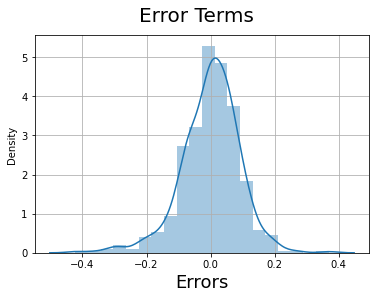

In [106]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)    # Plot heading               
plt.xlabel('Errors', fontsize = 18)           # Give the X-label
plt.grid()
plt.show()

**We can see Error terms are normally distributed.**    
From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.
Let's now make predictions on the test-set.

# <center> STEP 9: MAKING PREDICTIONS ON TEST DATASET USING THE FINAL MODEL

In [107]:
# Test Dataset Rows and Columns
bikesdf_test.shape

(219, 29)

In [108]:
#Test Dataset 
bikesdf_test.head()

Year  holiday  workingday       temp  humidity  windspeed  count  season_Spring  season_Summer  season_Winter  month_Aug  month_Dec  month_Feb  month_Jan  month_July  month_June  month_Mar  month_May  month_Nov  month_Oct  month_Sep  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  weekday_Wed  weathersit_Light_RainSnow  weathersit_Misty_Cloudy
184     0        1           0  29.793347   63.7917   5.459106   6043              0              0              0          0          0          0          0           1           0          0          0          0          0          0            0            0            0            0            0            1                          0                        1
535     1        0           1  32.082500   59.2083   7.625404   6211              0              1              0          0          0          0          0           0           1          0          0          0          0          0            0            0            0            1            0            0                          0                        0
299     0        0           0  19.270000   81.2917  13.250121   2659              0              0              1          0          0          0          0           0           0          0          0          0          1          0            0            1            0            0            0            0                          0                        1
221     0        0           1  31.433347   42.4167  13.417286   4780              0              0              0          1          0          0          0           0           0          0          0          0          0          0            0            0            0            0            0            0                          0                        0
152     0        0           0  29.315000   30.5000  19.583229   4968              0              1              0          0          0          0          0           0           1          0          0          0          0          0            0            1            0            0            0            0                          0                        0

### 9.1 Applying the Scaling on the Test Sets

In [109]:
# Scaling on the test sets
num_vars_test = ['temp', 'humidity', 'windspeed','count']

bikesdf_test[num_vars_test] = scaler.transform(bikesdf_test[num_vars_test])

In [110]:
# Checking Dataset
bikesdf_test.head()

Year  holiday  workingday      temp  humidity  windspeed     count  season_Spring  season_Summer  season_Winter  month_Aug  month_Dec  month_Feb  month_Jan  month_July  month_June  month_Mar  month_May  month_Nov  month_Oct  month_Sep  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  weekday_Wed  weathersit_Light_RainSnow  weathersit_Misty_Cloudy
184     0        1           0  0.831783  0.657364   0.084219  0.692706              0              0              0          0          0          0          0           1           0          0          0          0          0          0            0            0            0            0            0            1                          0                        1
535     1        0           1  0.901354  0.610133   0.153728  0.712034              0              1              0          0          0          0          0           0           1          0          0          0          0          0            0            0            0            1            0            0                          0                        0
299     0        0           0  0.511964  0.837699   0.334206  0.303382              0              0              1          0          0          0          0           0           0          0          0          0          1          0            0            1            0            0            0            0                          0                        1
221     0        0           1  0.881625  0.437098   0.339570  0.547400              0              0              0          1          0          0          0           0           0          0          0          0          0          0            0            0            0            0            0            0                          0                        0
152     0        0           0  0.817246  0.314298   0.537414  0.569029              0              1              0          0          0          0          0           0           1          0          0          0          0          0            0            1            0            0            0            0                          0                        0

In [111]:
#Checking Statistics of Scaled Test Dataset
bikesdf_test.describe()

Year     holiday  workingday        temp    humidity   windspeed       count  season_Spring  season_Summer  season_Winter   month_Aug   month_Dec   month_Feb   month_Jan  month_July  month_June   month_Mar   month_May   month_Nov   month_Oct   month_Sep  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  weekday_Wed  weathersit_Light_RainSnow  weathersit_Misty_Cloudy
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000     219.000000     219.000000     219.000000  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   219.000000   219.000000   219.000000   219.000000   219.000000   219.000000                 219.000000               219.000000
mean     0.479452    0.036530    0.639269    0.558941    0.638508    0.313350    0.520592       0.255708       0.264840       0.232877    0.059361    0.086758    0.100457    0.077626    0.105023    0.095890    0.054795    0.086758    0.073059    0.082192    0.086758     0.118721     0.173516     0.155251     0.141553     0.123288     0.155251                   0.027397                 0.319635
std      0.500722    0.188034    0.481313    0.233698    0.148974    0.159947    0.218435       0.437258       0.442259       0.423633    0.236840    0.282125    0.301297    0.268194    0.307285    0.295115    0.228100    0.282125    0.260830    0.275286    0.282125     0.324202     0.379560     0.362974     0.349389     0.329520     0.362974                   0.163612                 0.467403
min      0.000000    0.000000    0.000000    0.046591    0.261915   -0.042808    0.048205       0.000000       0.000000       0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000                   0.000000                 0.000000
25%      0.000000    0.000000    0.000000    0.354650    0.527265    0.198517    0.377531       0.000000       0.000000       0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000                   0.000000                 0.000000
50%      0.000000    0.000000    1.000000    0.558691    0.627737    0.299459    0.524275       0.000000       0.000000       0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000                   0.000000                 0.000000
75%      1.000000    0.000000    1.000000    0.759096    0.743928    0.403048    0.672745       1.000000       1.000000       0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000                   0.000000                 1.000000
max      1.000000    1.000000    1.000000    0.984424    1.002146    0.807474    0.963300       1.000000       1.000000       1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000     1.000000     1.000000     1.000000     1.000000     1.000000     1.000000                   1.000000                 1.000000

### 9.2 Dividing into X_test and y_test

In [112]:
# Split the 'bikesdf_test' set into X and y after scaling
y_test = bikesdf_test.pop('count')
X_test = bikesdf_test

In [113]:
X_test.head()

Year  holiday  workingday      temp  humidity  windspeed  season_Spring  season_Summer  season_Winter  month_Aug  month_Dec  month_Feb  month_Jan  month_July  month_June  month_Mar  month_May  month_Nov  month_Oct  month_Sep  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  weekday_Wed  weathersit_Light_RainSnow  weathersit_Misty_Cloudy
184     0        1           0  0.831783  0.657364   0.084219              0              0              0          0          0          0          0           1           0          0          0          0          0          0            0            0            0            0            0            1                          0                        1
535     1        0           1  0.901354  0.610133   0.153728              0              1              0          0          0          0          0           0           1          0          0          0          0          0            0            0            0            1            0            0                          0                        0
299     0        0           0  0.511964  0.837699   0.334206              0              0              1          0          0          0          0           0           0          0          0          0          1          0            0            1            0            0            0            0                          0                        1
221     0        0           1  0.881625  0.437098   0.339570              0              0              0          1          0          0          0           0           0          0          0          0          0          0            0            0            0            0            0            0                          0                        0
152     0        0           0  0.817246  0.314298   0.537414              0              1              0          0          0          0          0           0           1          0          0          0          0          0            0            1            0            0            0            0                          0                        0

In [114]:
print(X_test.shape)

(219, 28)


### 9.3 Building Model to make Predictions on Test Data

In [115]:
# Final 10 features selected for modelling were:
final_model.columns

Index(['Year', 'holiday', 'temp', 'windspeed', 'season_Spring', 'season_Winter', 'month_July', 'month_Sep', 'weathersit_Light_RainSnow', 'weathersit_Misty_Cloudy'], dtype='object')

In [116]:
# Building model to make predictions.

# Creating  a new dataframe X_test1 by subsetting final selected columns of our model.
X_test_1 = X_test[final_model.columns]

# Adding a constant variable to the test set created
X_test_1 = sm.add_constant(X_test_1)

In [117]:
#Checking info test set
X_test_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   const                      219 non-null    float64
 1   Year                       219 non-null    int64  
 2   holiday                    219 non-null    int64  
 3   temp                       219 non-null    float64
 4   windspeed                  219 non-null    float64
 5   season_Spring              219 non-null    uint8  
 6   season_Winter              219 non-null    uint8  
 7   month_July                 219 non-null    uint8  
 8   month_Sep                  219 non-null    uint8  
 9   weathersit_Light_RainSnow  219 non-null    uint8  
 10  weathersit_Misty_Cloudy    219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.5 KB


In [118]:
# Making predictions
y_pred = lm6.predict(X_test_1)

# <center> STEP 10: MODEL EVALUATION 

## 10.1 Visualising the Fit on the Testset

### Plotting y_test and y_pred to understand the spread

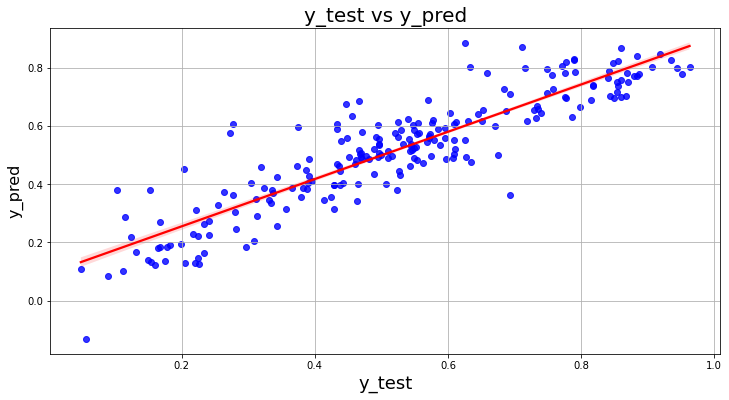

In [119]:
# Model evaluation by Plotting y_test and y_pred to understand the spread
#Regression plot
plt.figure(figsize=(12,6))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.grid()
plt.show()

- We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.
- From the above plot, it's evident that the model is doing well on the test set as well. Let's also check the R-squared and more importantly, the adjusted R-squared value for the test set.

## 10.2 Plotting Actual Test vs Predicted Test values

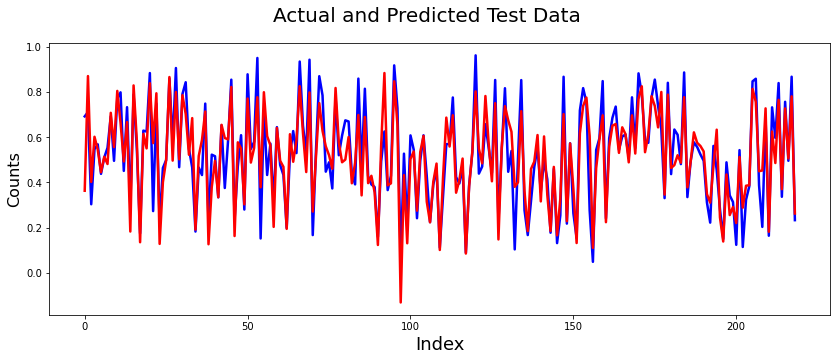

In [120]:
# Plotting actual y vs predicted y to significance of the model: 
# Plot Actual vs Predicted for Test Data
# Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
c = [i for i in range(0,len(X_test),1)] # generating index
fig = plt.figure(figsize=(14,5))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-") # Actual target variable
plt.plot(c,y_pred, color="red", linewidth=2.5, linestyle="-") # Predicted target variable
fig.suptitle('Actual and Predicted Test Data', fontsize=20)
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Counts', fontsize=16)                               # Y-label
plt.show()

#### Observation:

- From the above plot, it is evident that the model is doing well on the test set as well. 
- We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.

## 10.3 HOMOSCEDASTICITY

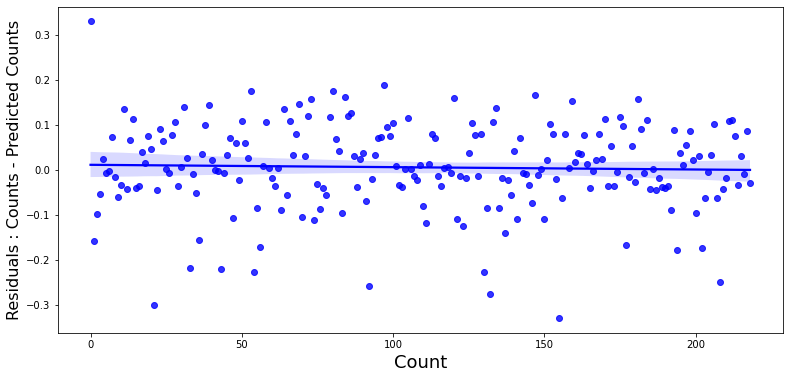

In [121]:
#Plot error terms for test data
# Check the distribution of residuals of test dataset
plt.figure(figsize=(13,6))
c = [i for i in range(0,len(X_test),1)]
res = y_test - y_pred
sns.regplot(c,res, color="blue", marker='o')
#plt.scatter(c,res)
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Count', fontsize=18)                      # X-label
plt.ylabel('Residuals : Counts - Predicted Counts', fontsize=16)  # Y-label
plt.show()

- As we can see the error terms are randomly distributed and there is no pattern which means the output is explained well by the model.
- **Homoscedasticity** stating that the variance of the error terms should be constant i.e the spread of residuals should  be constant for all values of X. (Graph Plotted Above showing Homoscedasticity)
- Hence, there are no other parameters that can explain the model better.

## 10.4 NORMALITY OF ERROR TERMS

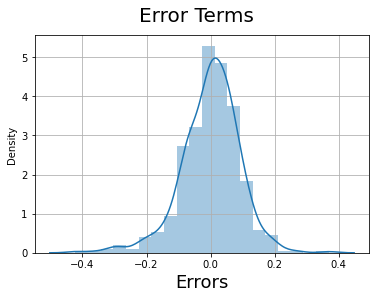

In [122]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)    # Plot heading               
plt.xlabel('Errors', fontsize = 18)           # Give the X-label
plt.grid()
plt.show()

**Error terms are following normal distribution with mean =0**

## 10.5 AUTOCORRELATION 

In [123]:
from statsmodels.stats.stattools import durbin_watson
  

# Using statsmodels.durbin_watson() method
value = durbin_watson(res)
  
print(value)

1.7991767353373975


**Durbin-Watson value of final model lm_6 is 1.799**, which signifies there is **No autocorrelation proving Independence of Residuals**.

## 10.6 STATISTICAL ANALYSIS OF FINAL MODEL

### 10.6.1  Finding R-squared and Adjusted R-Squared for Test set

In [124]:
# Calculating R2 score for 10 Features Selected
from sklearn.metrics import r2_score
r2=round(r2_score(y_test, y_pred),4)
r2

0.807

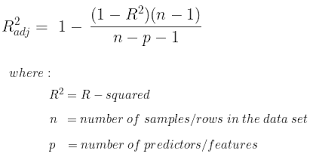

In [125]:
# Calculating Adjusted R2 using formula: Adj R^2 = (1−(1−R^2)∗(n−1)/(n−p−1))

n = X_test_1.shape[0]    # No. of sample rows of test data
p = len(list(final_model.columns))  # No. of predictors/ features

adjusted_r2 = round(1-((1-r2)*(n-1)/(n-p-1)),4)
adjusted_r2

0.7977

In [126]:
# No. of predictors (p):
len(list(final_model.columns))

10

In [127]:
# No. of Rows and columns in test dataset (n)
X_test_1.shape

(219, 11)

###  Final Result of R2 and Adjusted R2 of 10 Features Selected

In [128]:
final_result = pd.DataFrame(index=["Train data","Test data"])
final_result["r_square"]=[0.833,0.807] 
final_result["Adjusted_r_square"]=[0.830,0.7977]
final_result

r_square  Adjusted_r_square
Train data     0.833             0.8300
Test data      0.807             0.7977

Test and prediction R-Squared values are quite close. This is a good R-squared value. Hence, we can say our model is performing good even on unseen data (test data)

### 10.6.2 MSE : Mean Squared Error of Final Model

In [129]:
# Finding the Mean Squared Error of Final Model
from sklearn.metrics import mean_squared_error
m = mean_squared_error(y_true = y_test,y_pred = y_pred)
print("MSE : Mean Squared Error of Final Model is", m)

MSE : Mean Squared Error of Final Model is 0.009166211172450247


### 10.6.3 RMSE : Root Mean Square Value of Final Model

In [130]:
# Finding Root Mean Square Value of Final Model
import math
res = (y_pred - y_test)
rmse = math.sqrt(res.apply(lambda x: x * x).sum() / len(y_test))
print("RMSE is",rmse)
# Normalized root mean square error
norm_rmse = rmse /(y_pred.max() - y_pred.min())
print("Normalized RMSE is",norm_rmse)

RMSE is 0.09574033200511813
Normalized RMSE is 0.0941588589842563


### 10.6.4 Variance_Score

In [131]:
from sklearn.metrics import explained_variance_score
v = explained_variance_score(y_test,y_pred)
print("Variance Score of Final Model is:", v)

Variance Score of Final Model is: 0.8075933055375448


### 10.6.5 Observations:

- We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.
- The residuals are Normally distributed,having zero mean, constant variance and independent of each other. That indicates the Model is very good fit with the selected features in predicting unseen data.

**`EVALUATION METRICS:`** <br><br>

1. **R-square Value** of `Trained dataset` and `Tested dataset for the Final Model` ( Top 10 feature variables) is **83.3% and 80.7%**
<br><br>
2. **Adjusted R2 Value** of `Trained dataset` and `Tested dataset for the Final Model` ( Top 10 feature variables) is **83.0% and 79.7%**
<br><br>
3. This is a **Good R-squared & Adjusted R2 value**, hence we can see our model is performing good even on unseen data (Test data).
<br><br>
4. **P-value of all the Predictors are zero** indicates all **Predictors are SIGNIFICANT.**
<br><br>
5. **VIF values of all the Predictors** are **less than 5** indicates ,there is **NO MULTICOLLINEARITY** issue, there is **No Redundant features in the final Model**
<br><br>
6. **Probability of F-statistics** is **almost Equal to zero (Prob (F-statistic):1.16e-186)**,indicates that **Model is good fit with the features**, that means all the `Predictors(independent features) in the model are significant in explaining the variance of dependent variable`.
<br><br>
7. **RMSE is 0.095 and Normalized RMSE is 0.094**
<br><br>
8. **MSE : Mean Squared Error of Final Model is 0.009** and **Variance Score of Final Model is: 0.80**
<br><br>
9. **Durbin-Watson value of final model lm_6 is 1.799**, which signifies there is **No autocorrelation proving Independence of Residuals.**
<br><br>
10. All the **Assumptions of Linear Regression holds TRUE during Model Evaluation**: 
    - **Linearity** stating that the dependent variable Y should be linearly related to independent variables.
    - **Normality** stating that the X and Y variables should be normally distributed. Also, The error terms should be normally distributed.(Histogram of Residuals Plotted Above)
    - **Homoscedasticity** stating that the variance of the error terms should be constant i.e the spread of residuals should  be constant for all values of X. (Graph Plotted Above showing Homoscedasticity)
    - **Independence/No Multicollinearity** stating that the variables should be independent of each other i.e no correlation should be there between the independent variables. (VIF score less than 5 and Heatmap of Correlation Matrix plotted above).
    -**No Autocorrelation** stating that the error terms(yact – ypred) should be independent of each other. (Durbin-Watson Test)

## 10.7 MULTICOLLINEARITY

### Checking the correlations between the final predictor variables

### 10.7.1  VIF : Variance Inflation Factor - Verifying Multicollinearity

In [132]:
vif

Features   VIF
2                       temp  4.60
3                  windspeed  4.00
0                       Year  2.06
4              season_Spring  1.65
9    weathersit_Misty_Cloudy  1.51
5              season_Winter  1.40
6                 month_July  1.35
7                  month_Sep  1.20
8  weathersit_Light_RainSnow  1.08
1                    holiday  1.04

### 10.7.2 Correlation Matrix of Predictors : HEATMAP

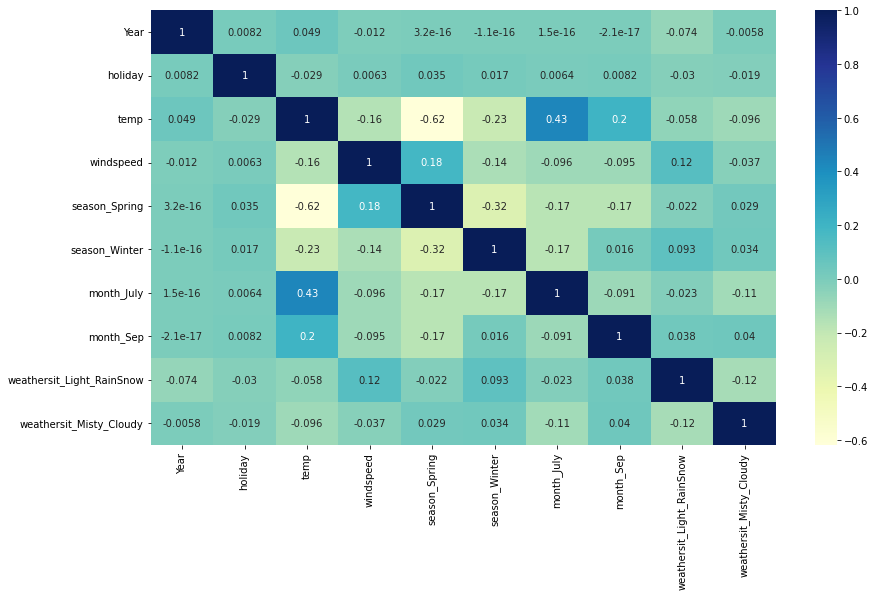

In [133]:
# Figure size
plt.figure(figsize=(14,8))

# Heatmap
sns.heatmap(boombikes[final_model.columns].corr(), cmap="YlGnBu", annot=True)
plt.show()

**Observation ->** <br>
**Independence/No Multicollinearity** stating that the variables should be independent of each other i.e no correlation should be there between the independent variables. (VIF score less than 5 and Heatmap of Correlation Matrix plotted above).

## 10.8 EQUATION FOR BEST FIT LINE

In [134]:
#Top Predictors for ModeLling Selected are:
print(list(final_model))

['Year', 'holiday', 'temp', 'windspeed', 'season_Spring', 'season_Winter', 'month_July', 'month_Sep', 'weathersit_Light_RainSnow', 'weathersit_Misty_Cloudy']


**`count = 0.2519 + (0.2341) Year – (0.0986) holiday + (0.4515) temp – (0.1398) windspeed - (0.1108) season_Spring	+ (0.0473) season_Winter – (0.0727) month_July	+ (0.0577) month_Sep	- (0.2864) weathersit_Light_RainSnow – (0.0811) weathersit_Misty_Cloudy`**

### 10.8.1 Coefficients of Features Selected in Final Model are

In [135]:
lm6.params

const                        0.251899
Year                         0.234092
holiday                     -0.098556
temp                         0.451455
windspeed                   -0.139817
season_Spring               -0.110795
season_Winter                0.047278
month_July                  -0.072719
month_Sep                    0.057705
weathersit_Light_RainSnow   -0.286408
weathersit_Misty_Cloudy     -0.081133
dtype: float64

### 10.8.2 Interpretation of Coefficients:

**As per our final Model, the Top 10 Predictor Variables that influences the demand of Bike Bookings are:**

1. **Temperature (temp)** - A coefficient value of ‘0.4515’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.4515 units.
<br><br>
2. **Year** - A coefficient value of ‘0.2341’ indicated that a unit increase in year variable increases the bike hire numbers by 0.2341 units.
<br><br>
3. **weathersit_Light_RainSnow**- A negative coefficient value of ‘-0.2864’ indicated that, w.r.t weathersit_Light_RainSnow, a unit increase in weathersit_Light_RainSnow) variable decreases the bike hire numbers by 0.2864 units.
`where, weathersit_3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds`
<br><br>
4. **weathersit_Misty_Cloudy** - A negative coefficient value of ‘-0.0811’ indicated that, w.r.t weathersit_Misty_Cloudy, a unit increase in weathersit_Misty_Cloudy variable decreases the bike hire numbers by 0.0811 units.
<br><br>
5. **windspeed** : A coefficient value of ‘-0.1398’ indicated that, w.r.t Windspeed, a unit increase in Windspeed variable, decreases the bike hire numbers by 0.1398 units.
<br><br>
6. **season_Spring** : A coefficient value of ‘-0.1107’ indicated that a unit increase in season_Spring variable, decreases the bike hire numbers by 0.1107 units.
<br><br>
7. **month_Sep** : A coefficient value of ‘0.0577’ indicated that a unit increase in month_Sep variable, increases the bike hire numbers by 0.0577 units.
<br><br>
8. **holiday** : A coefficient value of ‘-0.0985’ indicated that a unit increase in holiday variable, decreases the bike hire numbers by 0.0985 units.
<br><br>
9. **month_July** : A coefficient value of ‘-0.0727’ indicated that a unit increase in month_July variable, decreases the bike hire numbers by 0.0727 units.
<br><br>
10. **season_Winter** : A coefficient value of ‘0.0472’ indicated that a unit increase in season_Winter variable increases the bike hire numbers by 0.0472 units.
<br><br>
**`Conclusion::`**
- Here we can say that the variables which are having **+ve sign says that the if it increases, the target variable count & demand of bike sharing rentals will also increase.**
<br><br>
- And that variables having -ve values will decrease the target varible count & demand of bike rentals.
<br><br>
- From above we can say that the **temp is having the largest positive value, so it an important(significant) variable for the demands of bikes.**
<br><br>
- There would be **less bookings during Light Snow or Rain, they could probably use this time to service the bikes without having business impact.**
<br><br>
- We can see **demand for bikes will be more in upcoming year 2019** than 2018, so just focus as there is increase in 2019 and might be facing dips in their revenues due to the ongoing Corona pandemic and by the time it reduces the things will be much better.
<br><br>
- **Can focus more on Summer & Winter season, August, September month, Weekends, Working days as they have good influence on bike rentals.**
<br><br>
- Thus the **major factor which affects the bikes demands are - temp, Season, Month. Hence it is recommended to give utmost importance to these three variables while planning to achieve maximum booking.**
<br><br>

# <center> 11. STATISTICAL INSIGHTS OF THE FINAL MODEL

In [136]:
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.16e-186
Time:                        12:51:52   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

1. We arrived at a very decent model for the the demand for shared bikes with the **significant variables.** 
Thus, the **Final model consists of the 10 Significant Features** mentioned above. One can go ahead with this model and use it for **Predicting Demand & count of daily bike rentals.**
<br><br>
2. The **Final Predictors seem to have fairly Low Correlations.**
<br><br>
3. The **Co-efficients of the Predictors in the equation for Best Fitted Line**, indicates that, how the predictors affects the target variable.
<br><br>
4. **Temp, Year, holiday, windspeed, season_spring, season_winter, weathersit_Light_RainSnow, weathersit_Misty_Cloudy, month_July and month_sep are the predictors of the final Linear Regression Model**
<br><br>
5. We can see that **Temperature variable is having the highest coefficient 0.4515**, which means if the temperature increases by one unit the number of bike rentals increases by 0.4515 units
<br><br>
6. We can observe there are some **Variables with Negative Coefficients**, A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease. We have holiday, windspeed, spring season, mist cloudy weather , light rain-snow weather, July Month variables with negative coefficient. The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant.
<br><br>
**`EVALUATION METRICS:`** <br><br>

7. **R-square Value** of `Trained dataset` and `Tested dataset for the Final Model` ( Top 10 feature variables) is **83.3% and 80.7%**

8. **Adjusted R2 Value** of `Trained dataset` and `Tested dataset for the Final Model` ( Top 10 feature variables) is **83.0% and 79.7%**

9. This is a **Good R-squared & Adjusted R2 value**, hence we can see our model is performing good even on unseen data (Test data).

10. **P-value of all the Predictors are zero** indicates all **Predictors are SIGNIFICANT.**

11. **VIF values of all the Predictors** are **less than 5** indicates ,there is **NO MULTICOLLINEARITY** issue, there is **No Redundant features in the final Model**

12. **Probability of F-statistics** is **almost Equal to zero (Prob (F-statistic):1.16e-186)**,indicates that **Model is good fit with the features**, that means all the `Predictors(independent features) in the model are significant in explaining the variance of dependent variable`.

13. **RMSE is 0.095 and Normalized RMSE is 0.094**

14. **MSE : Mean Squared Error of Final Model is 0.009** and **Variance Score of Final Model is: 0.80**

15. **Durbin-Watson value of final model lm_6 is 1.799**, which signifies there is **No autocorrelation proving Independence of Residuals.**
<br><br>
16. All the **Assumptions of Linear Regression holds TRUE during Model Evaluation**: 
    - **Linearity** stating that the dependent variable Y should be linearly related to independent variables.
    - **Normality** stating that the X and Y variables should be normally distributed. Also, The error terms should be normally distributed.(Histogram of Residuals Plotted Above)
    - **Homoscedasticity** stating that the variance of the error terms should be constant i.e the spread of residuals should  be constant for all values of X. (Graph Plotted Above showing Homoscedasticity)
    - **Independence/No Multicollinearity** stating that the variables should be independent of each other i.e no correlation should be there between the independent variables. (VIF score less than 5 and Heatmap of Correlation Matrix plotted above).
    -**No Autocorrelation** stating that the error terms(yact – ypred) should be independent of each other. (Durbin-Watson Test)

# <center> 12. BUSINESS INSIGHTS

1. There is a **High demand for the shared bikes in coming years**. After corona lockdown, when the conditions become normal the 'Boom-Bikes' will get very good profit in shared bike business. 
<br><br> 
2. A US bike-sharing provider BoomBikes **can focus more on Temperature Factor**. July has pleasant weather, but still there is a small dip of demand for shared bikes, again in **September it reaches maximum.**
<br><br>
3. The **demand for shared bikes are more when the weather is clear, temp is high** and there is least demand when there is snow fall.
<br><br>
4. **Can focus more on Summer & Winter season, August, September month, Weekends, Working days as they have good influence on bike rentals.**
<br><br>
5. December and January is the beginning of Spring and still winter effect will be there, snow fall will be there. Therefore the demand for shared bikes is less. **From Feb onwards again it pickups.**
<br><br>
6. The demand for shared bike is reducing in spring season because spring season has negative coefficients and negatively correlated to bike rentals. **The Boom bike company can give some Spring Season offers to Increase the Demand in this season.** 
<br><br>
7. When there a **Misty weather and light-snow** the most of the people are not coming out. So there is a less demand for shared bikes. Now seeing to weathersit variable, we have got negative coefficients for Mist +cloudy and Lightsnow weather so we **can give offers to avoid inflation in Bike-Rental business.**
<br><br>
8. There would be less bookings during Light Snow or Rain, they could probably use this **time to service the bikes without having business impact.**
<br><br>
9. Whenever holiday is there the demand for shared bike is reducing. So the **Company can give some holiday offers or promotions to increase the demand.**
<br><br>
10. We can see **demand for bikes will be more in upcoming year 2019** than 2018, so just focus as there is increase in 2019 and might be facing dips in their revenues due to the ongoing Corona pandemic and by the time it reduces the things will be much better.

# <center> <font size = 16> THANK YOU <font/>
<center><font size = 5>
     <font color="maroon"><b>Submitted By<font/> - 
         <font color="orangered"><b>GURPREET KAUR<b/> <font color="g"><b> : <b/><font color="g"><b>  DSC43 Batch<b/> 